# Problem 1

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.

## Importing the necessary libraries

In [70]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

#Library to scale the data
from sklearn.preprocessing import StandardScaler

# Library to split data
from sklearn.model_selection import train_test_split

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# To build model for prediction
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis



# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    roc_curve,
    make_scorer,
    mean_absolute_error,
    mean_squared_error,
    r2_score,
)

import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
learn = pd.read_csv("Firm level data.csv")

In [4]:
# copying data to another variable to avoid any changes to original data
data = learn.copy()

## Overview of the dataset

### View the first and last 5 rows of the dataset

In [5]:
data.head() ##  Complete the code to view top 5 rows of the data

,Unnamed: 0,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions
0,0,826.99505,161.60399,10,382.07825,2.30600,no,11.04951,1625.45376,80.27000
1,1,407.75397,122.10101,2,0.00000,1.86000,no,0.84419,243.11708,59.02000
2,2,8407.84559,6221.14461,138,3296.70044,49.65900,yes,5.20526,25865.23380,47.70000
3,3,451.00001,266.89999,1,83.54016,3.07100,no,0.30522,63.02463,26.88000
4,4,174.92798,140.12400,2,14.23364,1.94700,no,1.06330,67.40641,49.46000


In [6]:
data.tail() ##  Complete the code to view top 5 rows of the data

,Unnamed: 0,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions
754,754,1253.90020,708.29994,32,412.93616,22.10000,yes,0.69745,267.11949,33.50000
755,755,171.82102,73.66601,1,0.03774,1.68400,no,NaN,228.47570,46.41000
756,756,202.72697,123.92699,13,74.86110,1.46000,no,5.22972,580.43074,42.25000
757,757,785.68794,138.78099,6,0.62175,2.90000,yes,1.62540,309.93865,61.39000
758,758,22.70200,14.24500,5,18.57436,0.19700,no,2.21307,18.94014,7.50000


### Understand the shape of the dataset

In [7]:
data.shape ## Complete the code to get the shape of data

(759, 10)

### Check the data types of the columns for the dataset

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    759 non-null    int64  
 1   sales         759 non-null    float64
 2   capital       759 non-null    float64
 3   patents       759 non-null    int64  
 4   randd         759 non-null    float64
 5   employment    759 non-null    float64
 6   sp500         759 non-null    object 
 7   tobinq        738 non-null    float64
 8   value         759 non-null    float64
 9   institutions  759 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 59.4+ KB


### Dropping the duplicate values

In [9]:
# checking for duplicate values
data.duplicated().sum() ## Complete the code to check duplicate entries in the data

0

### Dropping the unique values column

In [10]:
# checking the number of unique values
data["Unnamed: 0"].nunique()

759

**Let's drop the column first before we proceed forward**.

In [11]:
data = data.drop(("Unnamed: 0"),axis = True)

**Let's check the statistical summary of the data.**

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
sales,759.00000,2689.70516,8722.06012,0.13800,122.92000,448.57708,1822.54737,135696.78820
capital,759.00000,1977.74750,6466.70490,0.05700,52.65050,202.17902,1075.79002,93625.20056
patents,759.00000,25.83136,97.25958,0.00000,1.00000,3.00000,11.50000,1220.00000
randd,759.00000,439.93807,2007.39759,0.00000,4.62826,36.86414,143.25340,30425.25586
employment,759.00000,14.16452,43.32144,0.00600,0.92750,2.92400,10.05000,710.79993
tobinq,738.00000,2.79491,3.36659,0.11900,1.01878,1.68030,3.13931,20.00000
value,759.00000,2732.73475,7071.07236,1.97105,103.59395,410.79353,2054.16039,95191.59116
institutions,759.00000,43.02054,21.68559,0.00000,25.39500,44.11000,60.51000,90.15000


## Exploratory Data Analysis

In [13]:
# Making a list of all catrgorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

no     542
yes    217
Name: sp500, dtype: int64
--------------------------------------------------


**The below functions need to be defined to carry out the EDA.**

In [14]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [15]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [16]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [17]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate Analysis

#### Observations on sales

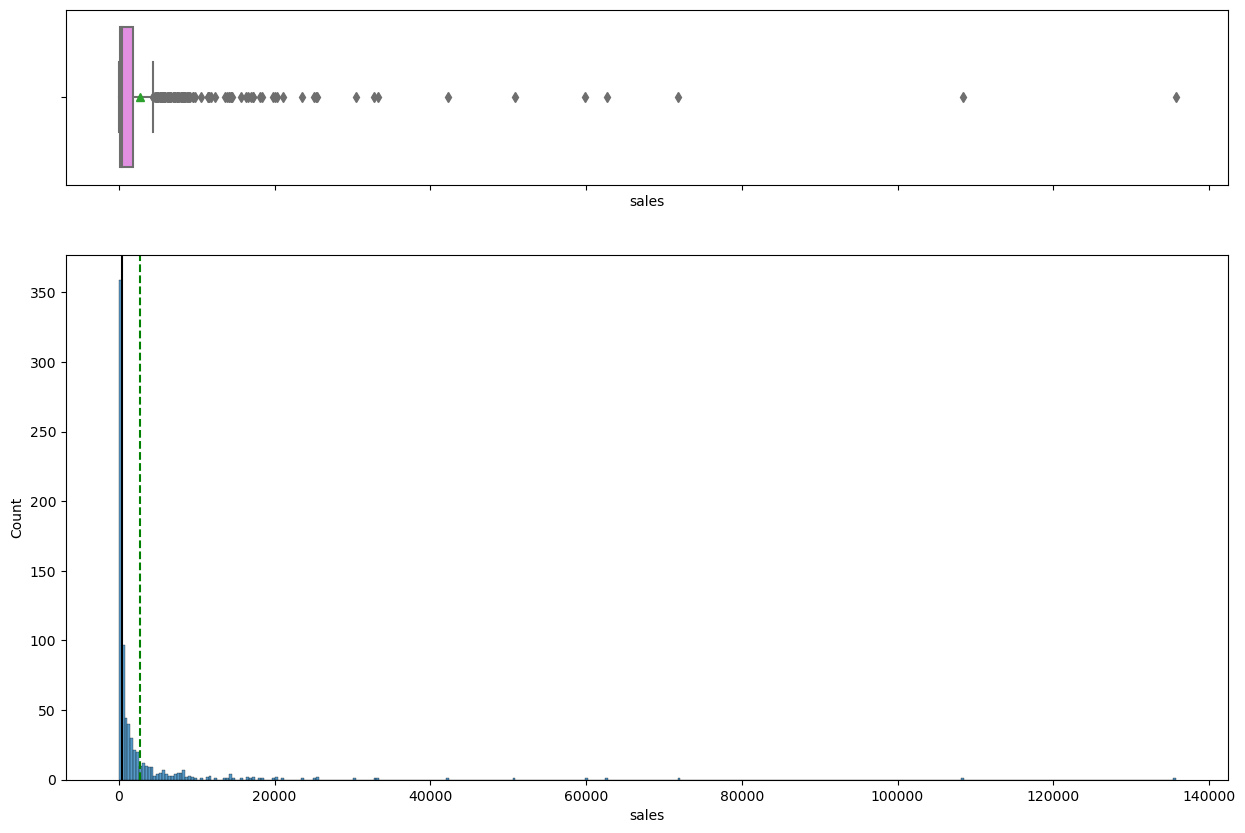

In [18]:
histogram_boxplot(data, "sales")
plt.savefig("output.jpg", bbox_inches='tight')

#### Observations on Capital

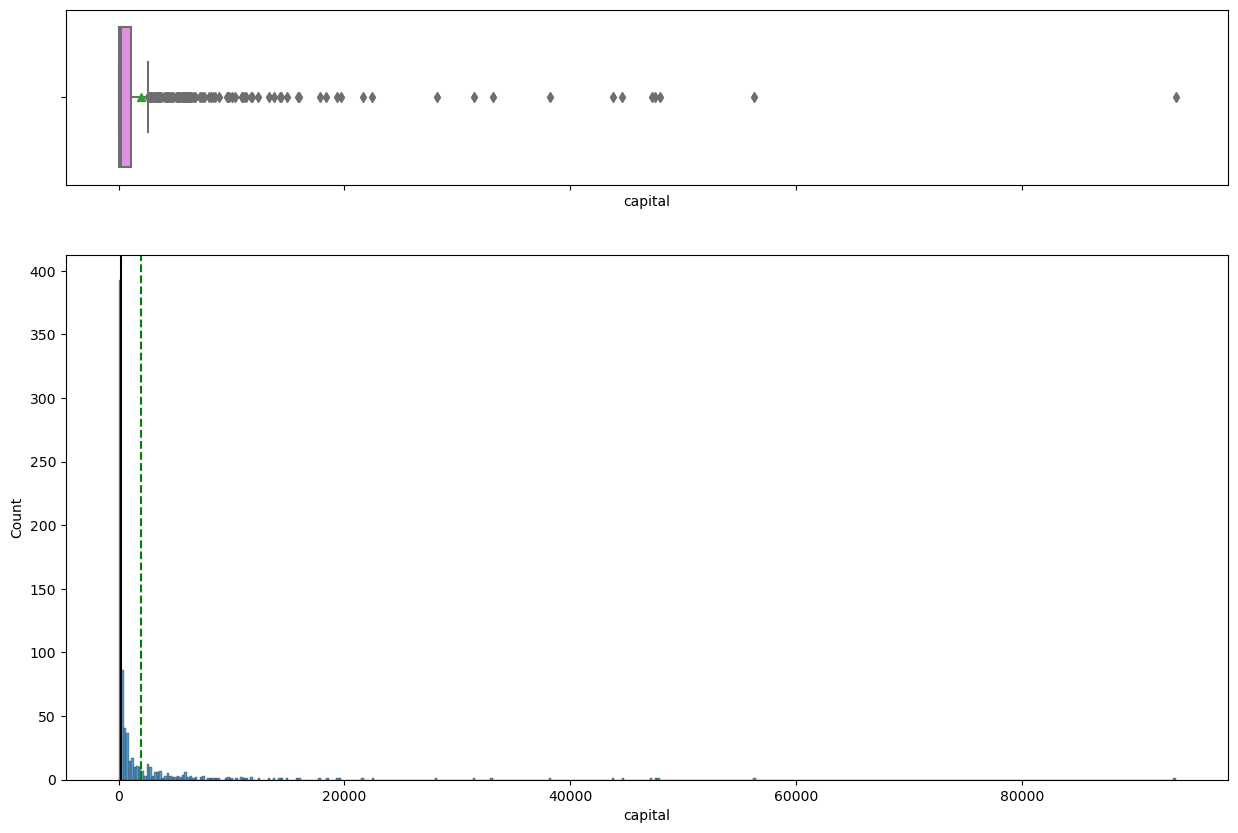

In [19]:
histogram_boxplot(data, "capital")
plt.savefig("output.jpg", bbox_inches='tight')

#### Observations on number of patents

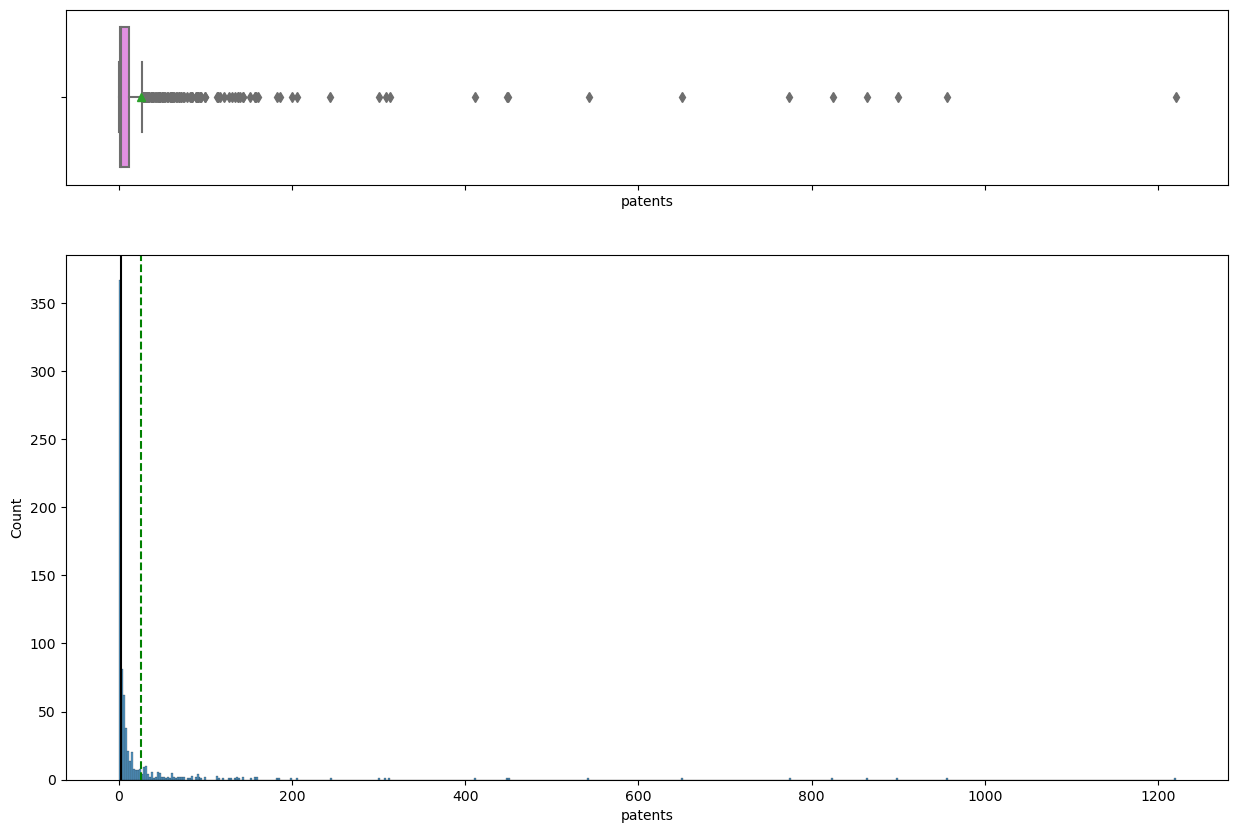

In [20]:
histogram_boxplot(data, "patents")
plt.savefig("output.jpg", bbox_inches='tight')

#### Observations on number of R&D

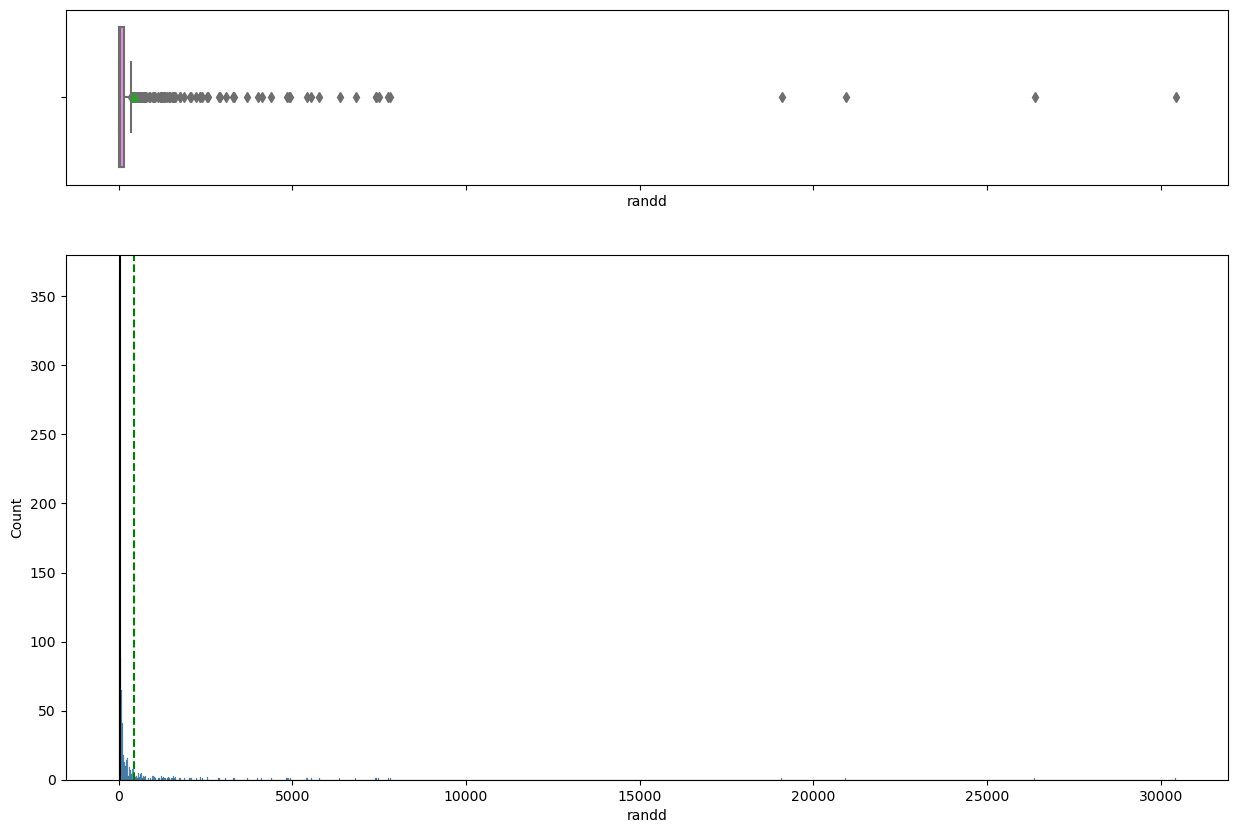

In [21]:
histogram_boxplot(data, "randd")
plt.savefig("output.jpg", bbox_inches='tight')

#### Observations on number of employment

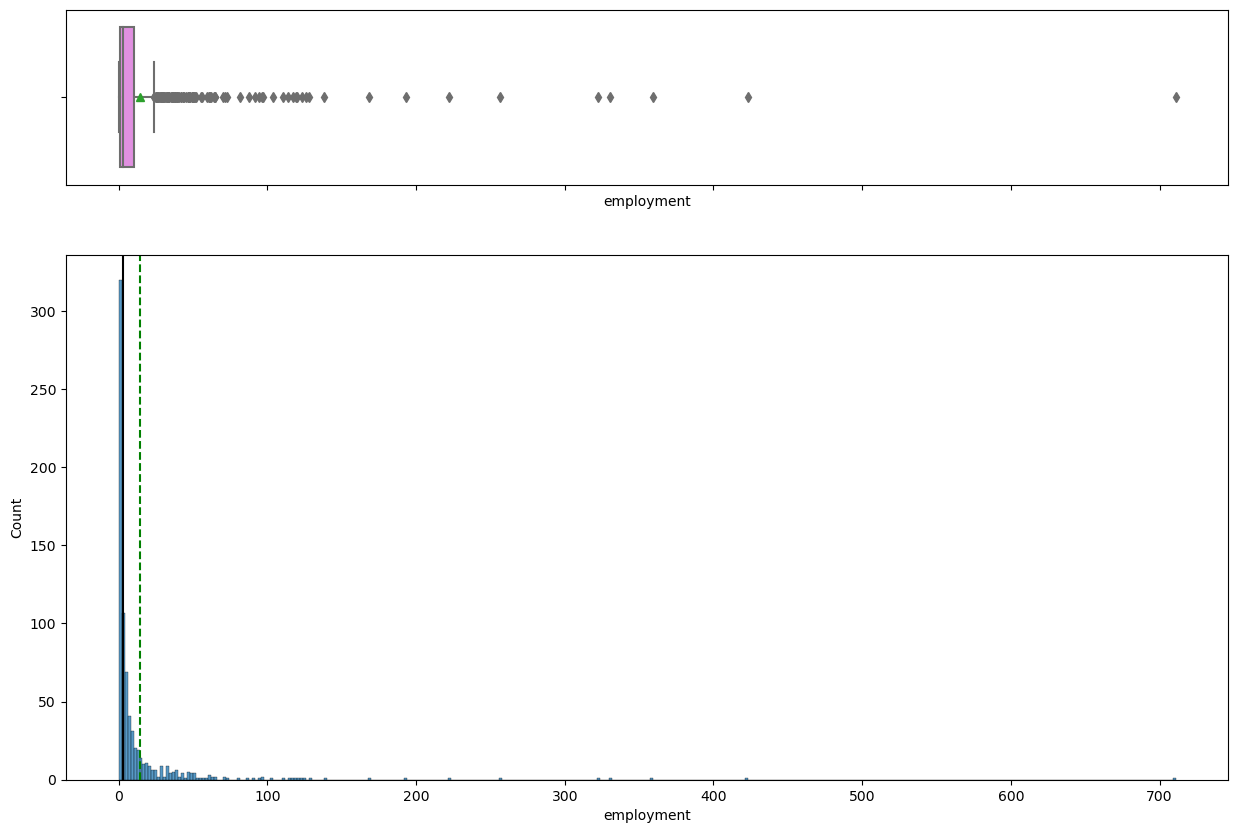

In [22]:
histogram_boxplot(data, "employment")
plt.savefig("output.jpg", bbox_inches='tight')

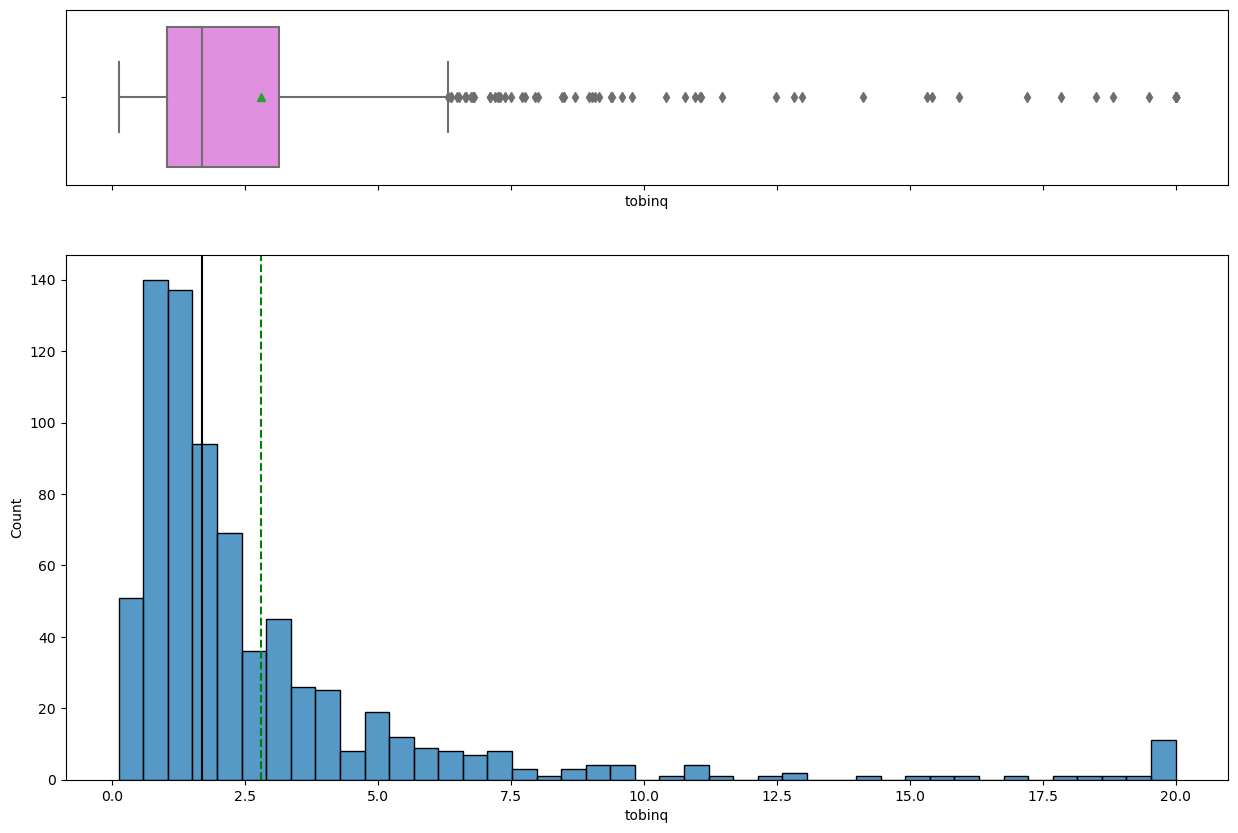

In [23]:
histogram_boxplot(data, "tobinq")
plt.savefig("output.jpg", bbox_inches='tight')

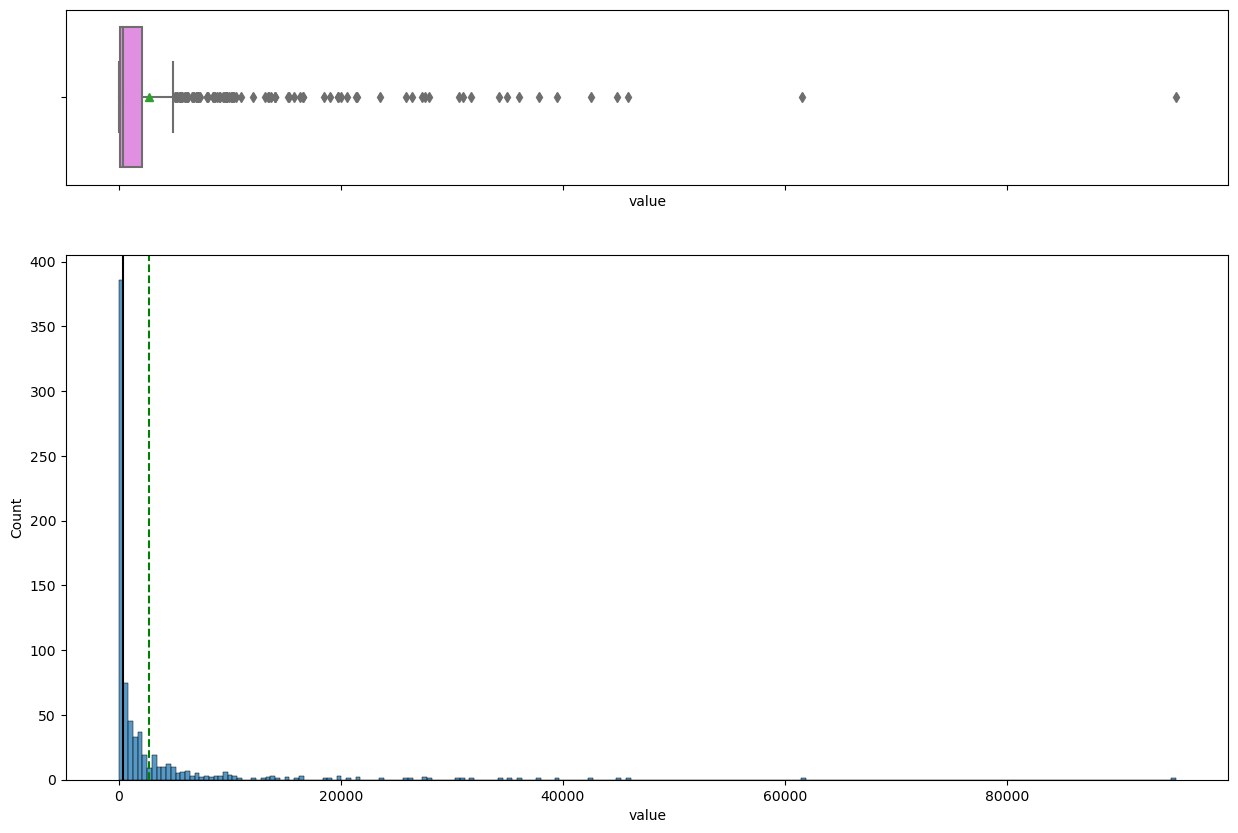

In [24]:
histogram_boxplot(data, "value")

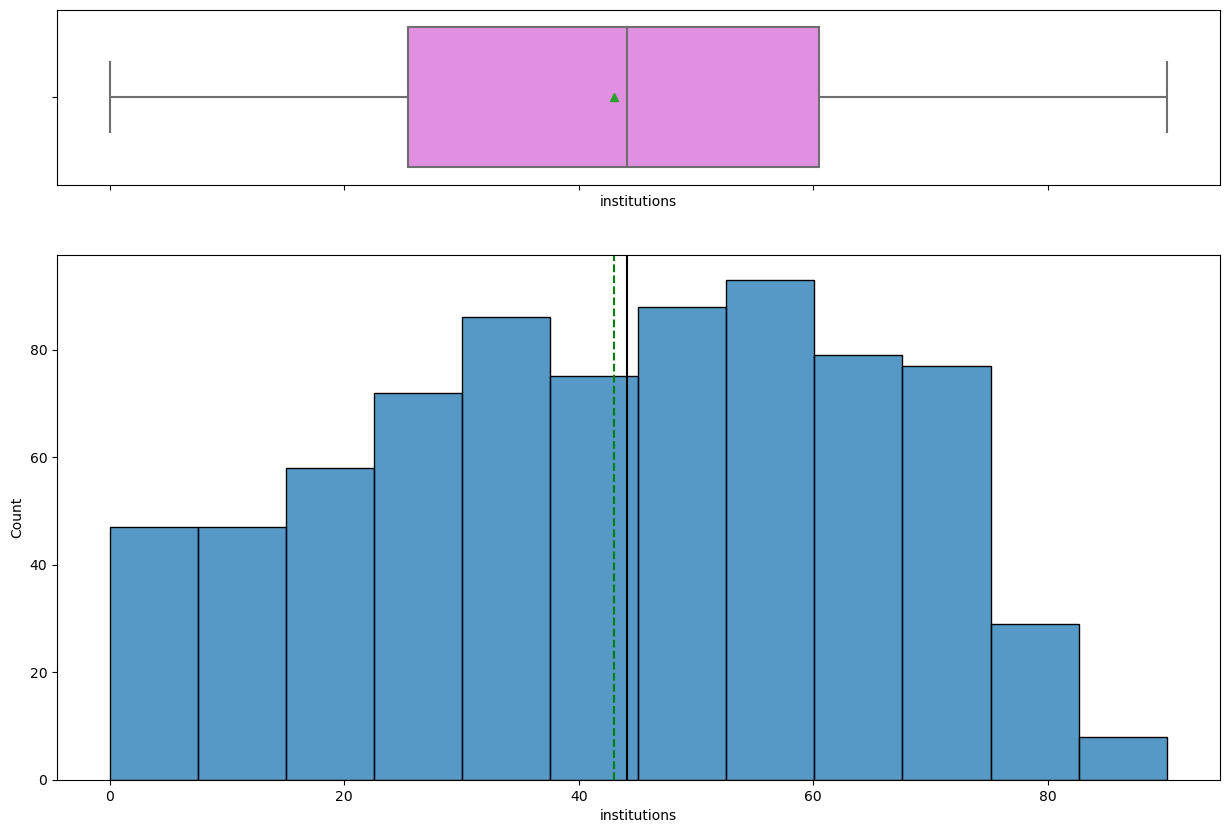

In [25]:
histogram_boxplot(data, "institutions")
plt.savefig("output.jpg", bbox_inches='tight')

### Bivariate Analysis

#### Observation of employment on sales

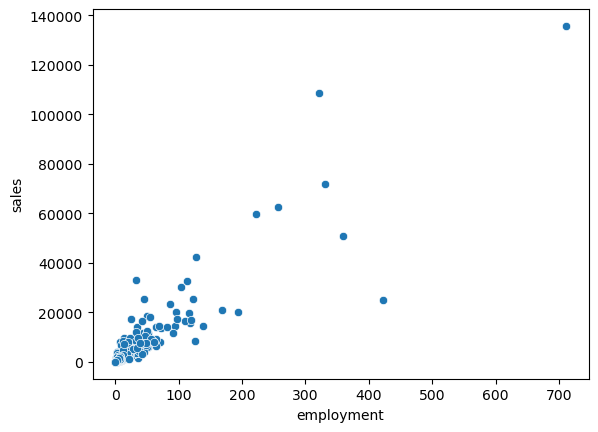

<Figure size 640x480 with 0 Axes>

In [26]:
sns.scatterplot(data=data, x="employment", y="sales")
plt.show()
plt.savefig("output.jpg", bbox_inches='tight')

#### Observation of Patents on sales

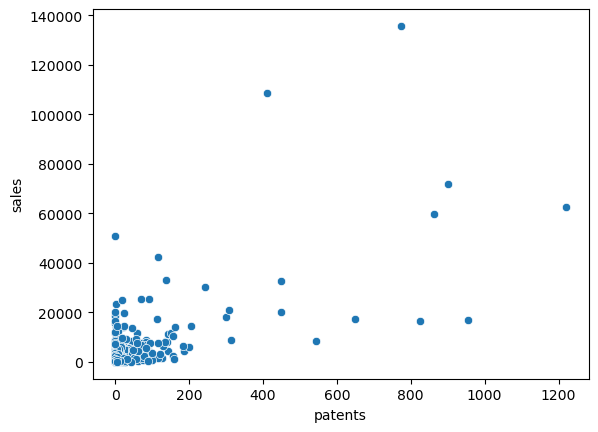

<Figure size 640x480 with 0 Axes>

In [27]:
sns.scatterplot(data=data, x="patents", y="sales")
plt.show()
plt.savefig("output.jpg", bbox_inches='tight')

#### Observation of tobinq on sales

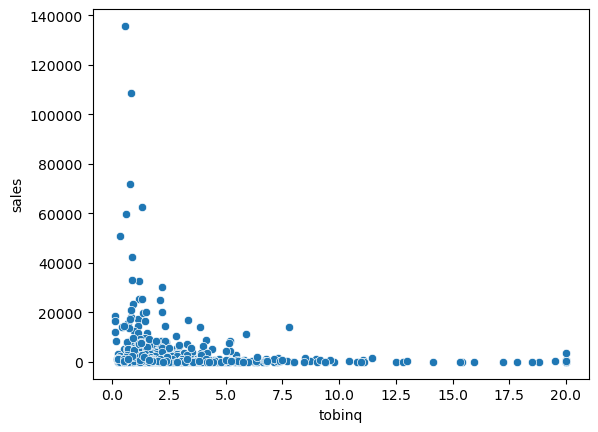

<Figure size 640x480 with 0 Axes>

In [28]:
sns.scatterplot(data=data, x="tobinq", y="sales")
plt.show()
plt.savefig("output.jpg", bbox_inches='tight')

#### Distribution of sales on sp500

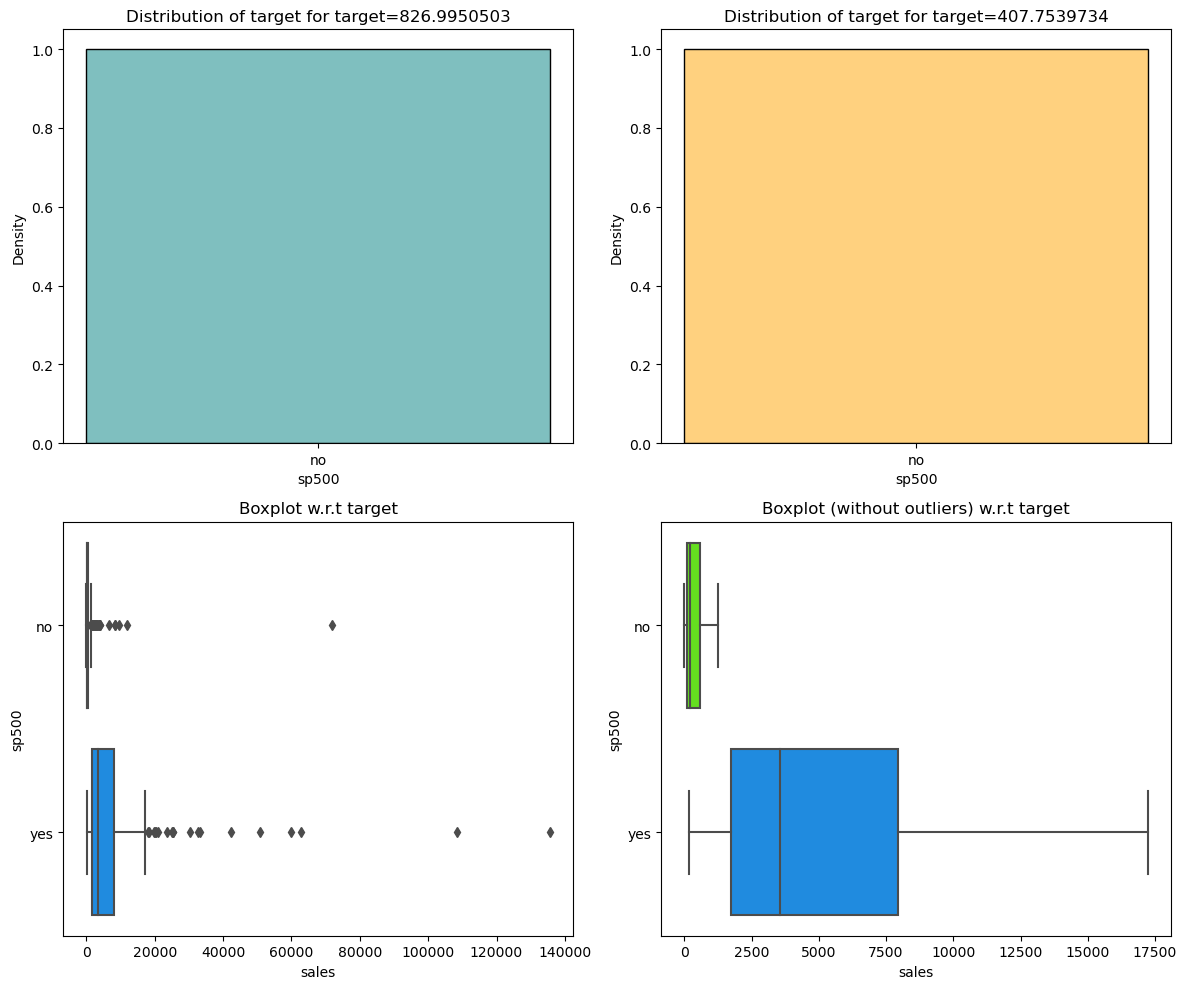

<Figure size 640x480 with 0 Axes>

In [29]:
distribution_plot_wrt_target(data,"sp500","sales")
plt.savefig("output.jpg", bbox_inches='tight')

#### Correlation Map

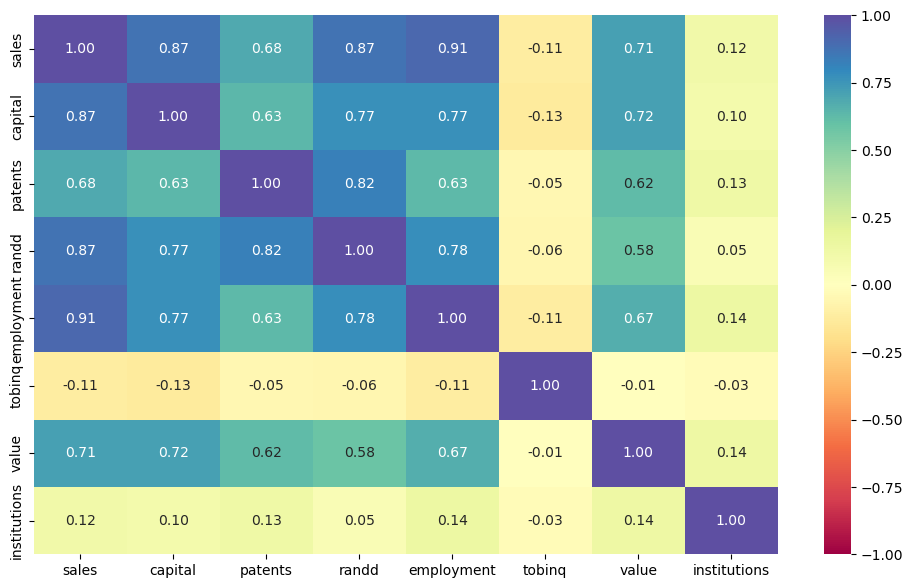

<Figure size 640x480 with 0 Axes>

In [30]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()
plt.savefig("output.jpg", bbox_inches='tight')

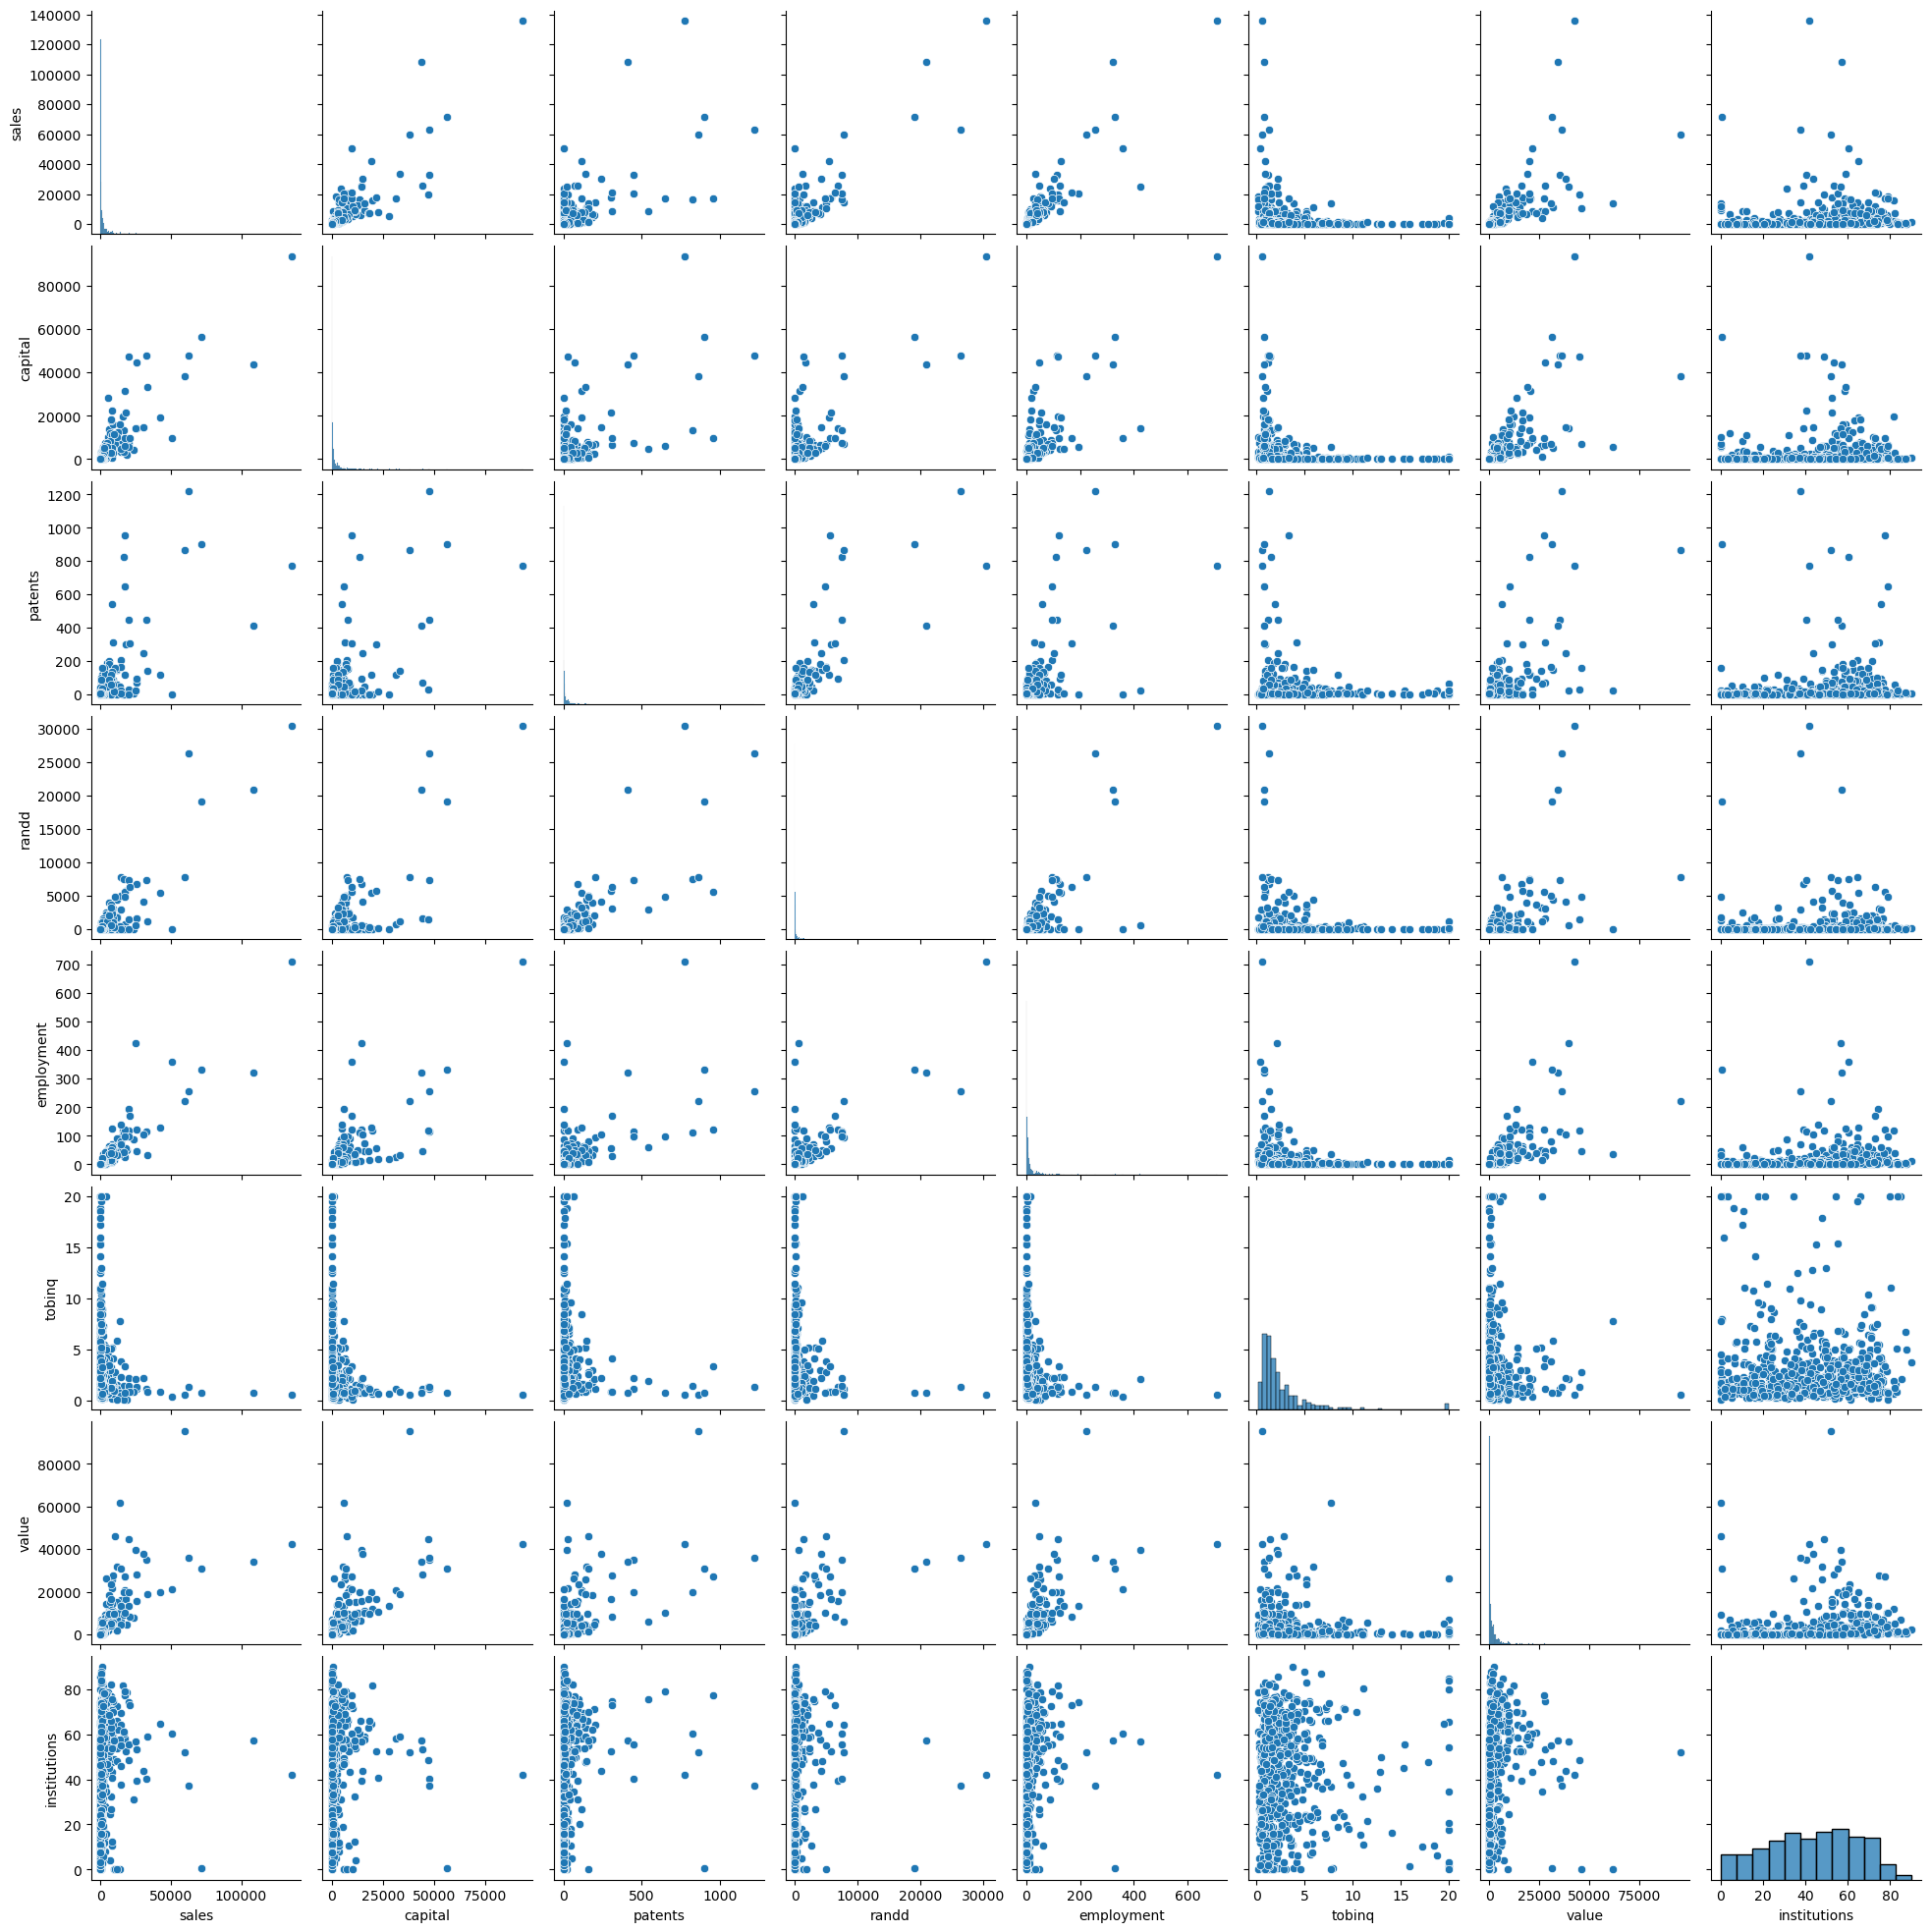

<Figure size 640x480 with 0 Axes>

In [31]:
sns.pairplot(data)
plt.show()
plt.savefig("output.jpg", bbox_inches='tight')

## Date Pre-processing

### Missing Value Treatment

In [32]:
data.isnull().sum()

sales            0
capital          0
patents          0
randd            0
employment       0
sp500            0
tobinq          21
value            0
institutions     0
dtype: int64

In [33]:
data['tobinq'] = data['tobinq'].fillna(data["tobinq"].median()) # Impute the null values with a suitable measure

In [34]:
data.isnull().sum()

sales           0
capital         0
patents         0
randd           0
employment      0
sp500           0
tobinq          0
value           0
institutions    0
dtype: int64

### Outlier Check

- Let's check for outliers in the data.

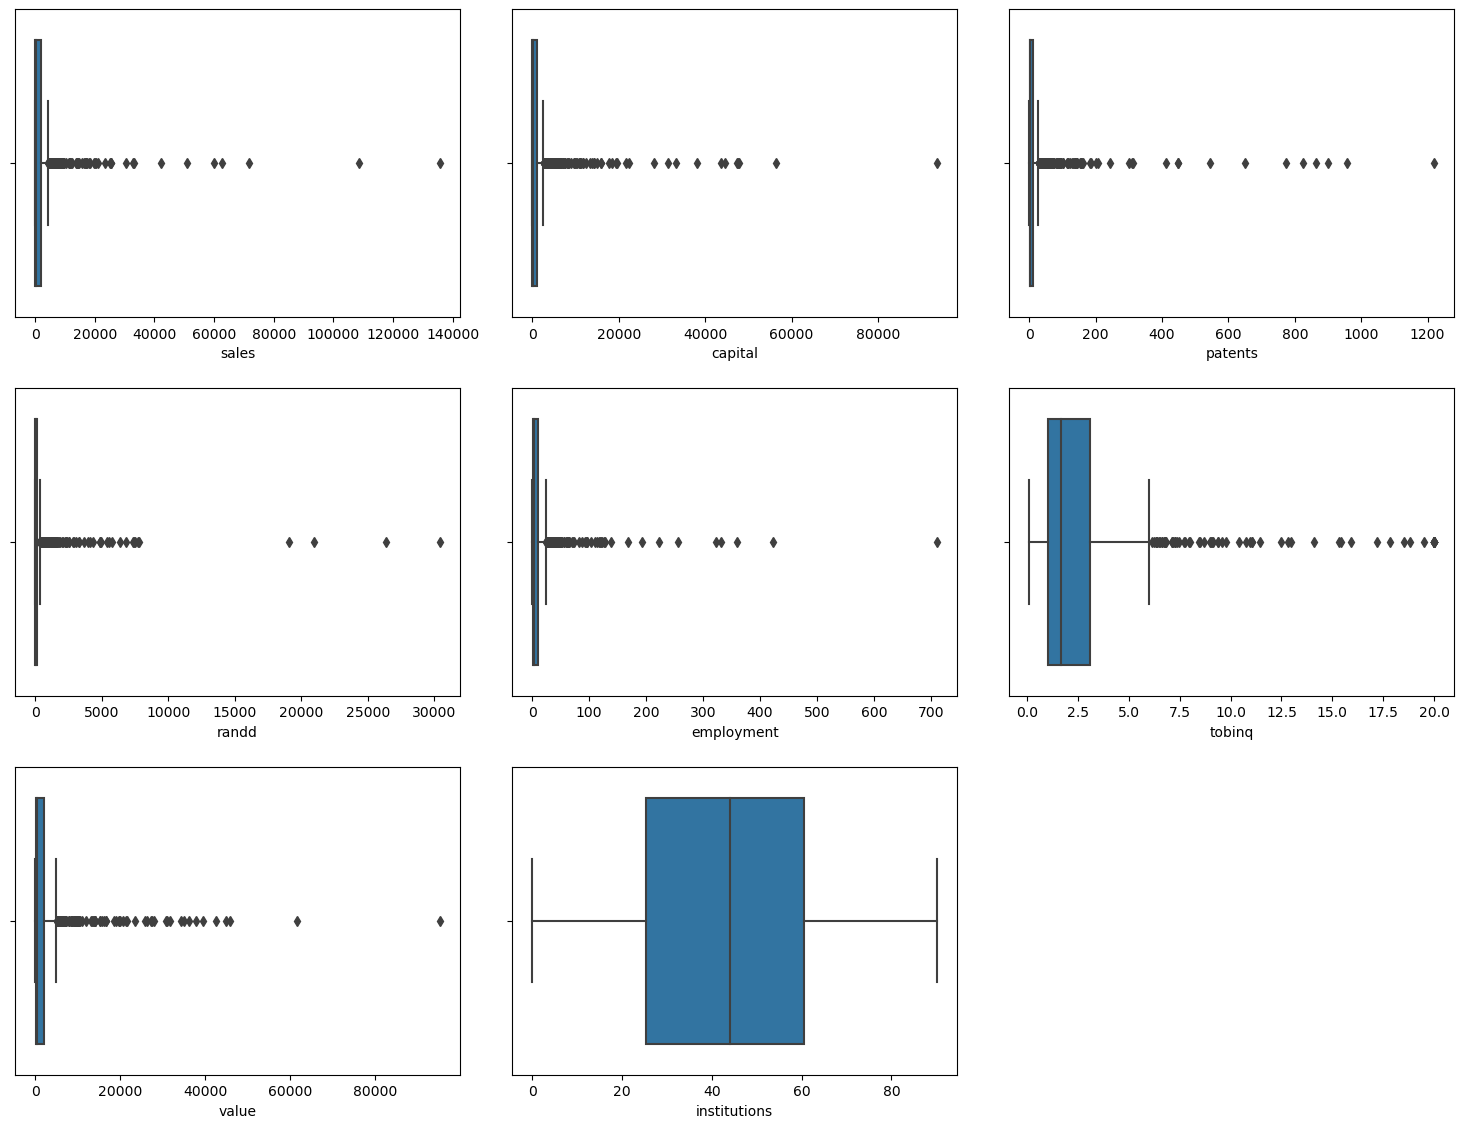

<Figure size 640x480 with 0 Axes>

In [35]:
# outlier detection using boxplot
num_cols = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=data, x=variable)  # Plot a suitable visual to check outliers
    plt.tight_layout(pad=2)

plt.show()
plt.savefig("output.jpg", bbox_inches='tight')

### Encoding

In [36]:
# defining the dependent and independent variables
X = data.drop(["sales"], axis=1)
y = data["sales"]

print(X.head())
print()
print(y.head())

     capital  patents      randd  employment sp500   tobinq       value  \
0  161.60399       10  382.07825     2.30600    no 11.04951  1625.45376   
1  122.10101        2    0.00000     1.86000    no  0.84419   243.11708   
2 6221.14461      138 3296.70044    49.65900   yes  5.20526 25865.23380   
3  266.89999        1   83.54016     3.07100    no  0.30522    63.02463   
4  140.12400        2   14.23364     1.94700    no  1.06330    67.40641   

   institutions  
0      80.27000  
1      59.02000  
2      47.70000  
3      26.88000  
4      49.46000  

0    826.99505
1    407.75397
2   8407.84559
3    451.00001
4    174.92798
Name: sales, dtype: float64


In [37]:
# let's add the intercept to data
X = sm.add_constant(X)

In [38]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
) # perform dummy encoding on the categoriacal features

X.head()

,const,capital,patents,randd,employment,tobinq,value,institutions,sp500_yes
0,1.00000,161.60399,10,382.07825,2.30600,11.04951,1625.45376,80.27000,0
1,1.00000,122.10101,2,0.00000,1.86000,0.84419,243.11708,59.02000,0
2,1.00000,6221.14461,138,3296.70044,49.65900,5.20526,25865.23380,47.70000,1
3,1.00000,266.89999,1,83.54016,3.07100,0.30522,63.02463,26.88000,0
4,1.00000,140.12400,2,14.23364,1.94700,1.06330,67.40641,49.46000,0


In [39]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [40]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 531
Number of rows in test data = 228


In [41]:
x_train.head()

,const,capital,patents,randd,employment,tobinq,value,institutions,sp500_yes
517,1.00000,87.51000,4,93.67892,1.56700,4.92243,426.92982,49.31000,0
83,1.00000,939.39882,29,251.91893,15.90000,2.33934,3221.51235,69.97000,1
61,1.00000,134.42202,21,114.85410,4.50900,1.02718,499.46127,37.68000,0
676,1.00000,870.27879,0,0.20930,2.70000,0.69570,432.21225,44.11000,0
746,1.00000,90.60802,1,0.00000,5.08800,2.02587,220.91163,40.94000,0


## Model Building

In [42]:
olsmodel1 = sm.OLS(y_train,x_train).fit()  #train the model with with dependent and independent sets
print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     1009.
Date:                Wed, 27 Mar 2024   Prob (F-statistic):          8.05e-312
Time:                        11:49:55   Log-Likelihood:                -4872.7
No. Observations:                 531   AIC:                             9763.
Df Residuals:                     522   BIC:                             9802.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -93.9839    257.645     -0.365   

In [43]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))



# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared


    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "R-squared": r2,
            "Adj. R-squared": adjr2,
        },
        index=[0],
    )

    return df_perf

In [44]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel1_train_perf = model_performance_regression(olsmodel1, x_train, y_train)
olsmodel1_train_perf

Training Performance



,R-squared,Adj. R-squared
0,0.93925,0.93820


In [45]:
olsmodel1_test_perf = model_performance_regression(olsmodel1, x_test, y_test)
print("Test Performance:")
print(olsmodel1_test_perf)

Test Performance:
   R-squared  Adj. R-squared
0    0.84826         0.84200


**Dealing with high p-value variables**
- Some of the dummy variables in the data have p-value > 0.05. So, they are not significant and we'll drop them
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value
    - Repeat the above two steps till there are no columns with p-value > 0.05

**Note**: The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [46]:
# initial list of columns
predictors = x_train.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['capital', 'patents', 'randd', 'employment', 'value']


In [47]:
x_train2 = x_train[selected_features]
x_test2 = x_test[selected_features]

In [48]:
olsmodel2 = sm.OLS(y_train, x_train2).fit() # build the model using dependent and selected features set
print(olsmodel2.summary())

                                 OLS Regression Results                                
Dep. Variable:                  sales   R-squared (uncentered):                   0.944
Model:                            OLS   Adj. R-squared (uncentered):              0.943
Method:                 Least Squares   F-statistic:                              1769.
Date:                Wed, 27 Mar 2024   Prob (F-statistic):                        0.00
Time:                        11:50:19   Log-Likelihood:                         -4874.0
No. Observations:                 531   AIC:                                      9758.
Df Residuals:                     526   BIC:                                      9779.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [49]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel2_train_perf = model_performance_regression(olsmodel2, x_train2, y_train)
olsmodel2_train_perf

Training Performance



,R-squared,Adj. R-squared
0,0.93894,0.93836


In [50]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel2_test_perf = model_performance_regression(olsmodel2, x_test2, y_test)

Test Performance



In [51]:
# Call the function to calculate performance metrics for the OLS model on the test set
olsmodel2_test_perf = model_performance_regression(olsmodel2, x_test2, y_test)
print("Test Performance:")
print(olsmodel2_test_perf)

Test Performance:
   R-squared  Adj. R-squared
0    0.84660         0.84315


# Problem 2

## Importing the necessary libraries

In [2]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
learn = pd.read_csv("Car_Crash.csv")

In [5]:
# copying data to another variable to avoid any changes to original data
data = learn.copy()

## Overview of the dataset

### View the first and last 5 rows of the dataset

In [6]:
data.head()

,Unnamed: 0,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,caseid
0,0,55+,27.07800,Not_Survived,none,none,1,m,32,1997,1987.00000,unavail,driver,0,4.00000,2:13:2
1,1,25-39,89.62700,Not_Survived,airbag,belted,0,f,54,1997,1994.00000,nodeploy,driver,0,4.00000,2:17:1
2,2,55+,27.07800,Not_Survived,none,belted,1,m,67,1997,1992.00000,unavail,driver,0,4.00000,2:79:1
3,3,55+,27.07800,Not_Survived,none,belted,1,f,64,1997,1992.00000,unavail,pass,0,4.00000,2:79:1
4,4,55+,13.37400,Not_Survived,none,none,1,m,23,1997,1986.00000,unavail,driver,0,4.00000,4:58:1


In [7]:
data.tail()

,Unnamed: 0,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,caseid
11212,11212,25-39,3179.68800,survived,none,belted,1,m,17,2002,1985.00000,unavail,driver,0,0.00000,82:107:1
11213,11213,10-24,71.22800,survived,airbag,belted,1,m,54,2002,2002.00000,nodeploy,driver,0,2.00000,82:108:2
11214,11214,10-24,10.47400,survived,airbag,belted,1,f,27,2002,1990.00000,deploy,driver,1,3.00000,82:110:1
11215,11215,25-39,10.47400,survived,airbag,belted,1,f,18,2002,1999.00000,deploy,driver,1,0.00000,82:110:2
11216,11216,25-39,10.47400,survived,airbag,belted,1,m,17,2002,1999.00000,deploy,pass,1,0.00000,82:110:2


### Understand the shape of the dataset

In [8]:
data.shape

(11217, 16)

### Check the data types of the columns for the dataset

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11217 entries, 0 to 11216
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   11217 non-null  int64  
 1   dvcat        11217 non-null  object 
 2   weight       11217 non-null  float64
 3   Survived     11217 non-null  object 
 4   airbag       11217 non-null  object 
 5   seatbelt     11217 non-null  object 
 6   frontal      11217 non-null  int64  
 7   sex          11217 non-null  object 
 8   ageOFocc     11217 non-null  int64  
 9   yearacc      11217 non-null  int64  
 10  yearVeh      11217 non-null  float64
 11  abcat        11217 non-null  object 
 12  occRole      11217 non-null  object 
 13  deploy       11217 non-null  int64  
 14  injSeverity  11140 non-null  float64
 15  caseid       11217 non-null  object 
dtypes: float64(3), int64(5), object(8)
memory usage: 1.4+ MB


### Dropping the duplicate values

In [10]:
# checking for duplicate values
data.duplicated().sum()

0

### Statistical Summary

**Let's check the statistical summary of the data.**

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,11217.00000,5608.00000,3238.21332,0.00000,2804.00000,5608.00000,8412.00000,11216.00000
weight,11217.00000,431.40531,1406.20294,0.00000,28.29200,82.19500,324.05600,31694.04000
frontal,11217.00000,0.64402,0.47883,0.00000,0.00000,1.00000,1.00000,1.00000
ageOFocc,11217.00000,37.42765,18.19243,16.00000,22.00000,33.00000,48.00000,97.00000
yearacc,11217.00000,2001.10324,1.05681,1997.00000,2001.00000,2001.00000,2002.00000,2002.00000
yearVeh,11217.00000,1994.17794,5.65870,1953.00000,1991.00000,1995.00000,1999.00000,2003.00000
deploy,11217.00000,0.38914,0.48758,0.00000,0.00000,0.00000,1.00000,1.00000
injSeverity,11140.00000,1.82558,1.37854,0.00000,1.00000,2.00000,3.00000,5.00000


## Exploratory Data Analysis

In [12]:
# Making a list of all catrgorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

10-24      5414
25-39      3368
40-54      1344
55+         809
1-9km/h     282
Name: dvcat, dtype: int64
--------------------------------------------------
survived        10037
Not_Survived     1180
Name: Survived, dtype: int64
--------------------------------------------------
airbag    7064
none      4153
Name: airbag, dtype: int64
--------------------------------------------------
belted    7849
none      3368
Name: seatbelt, dtype: int64
--------------------------------------------------
m    6048
f    5169
Name: sex, dtype: int64
--------------------------------------------------
deploy      4365
unavail     4153
nodeploy    2699
Name: abcat, dtype: int64
--------------------------------------------------
driver    8786
pass      2431
Name: occRole, dtype: int64
--------------------------------------------------
73:100:2    7
78:2:1      6
73:110:1    6
49:156:1    6
74:74:2     6
           ..
74:186:1    1
74:185:2    1
74:183:1    1
74:180:2    1
2:95:1      1
Name: caseid, L

**The below functions need to be defined to carry out the EDA.**

In [13]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [14]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [15]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [16]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate Analysis

#### Observations on weight

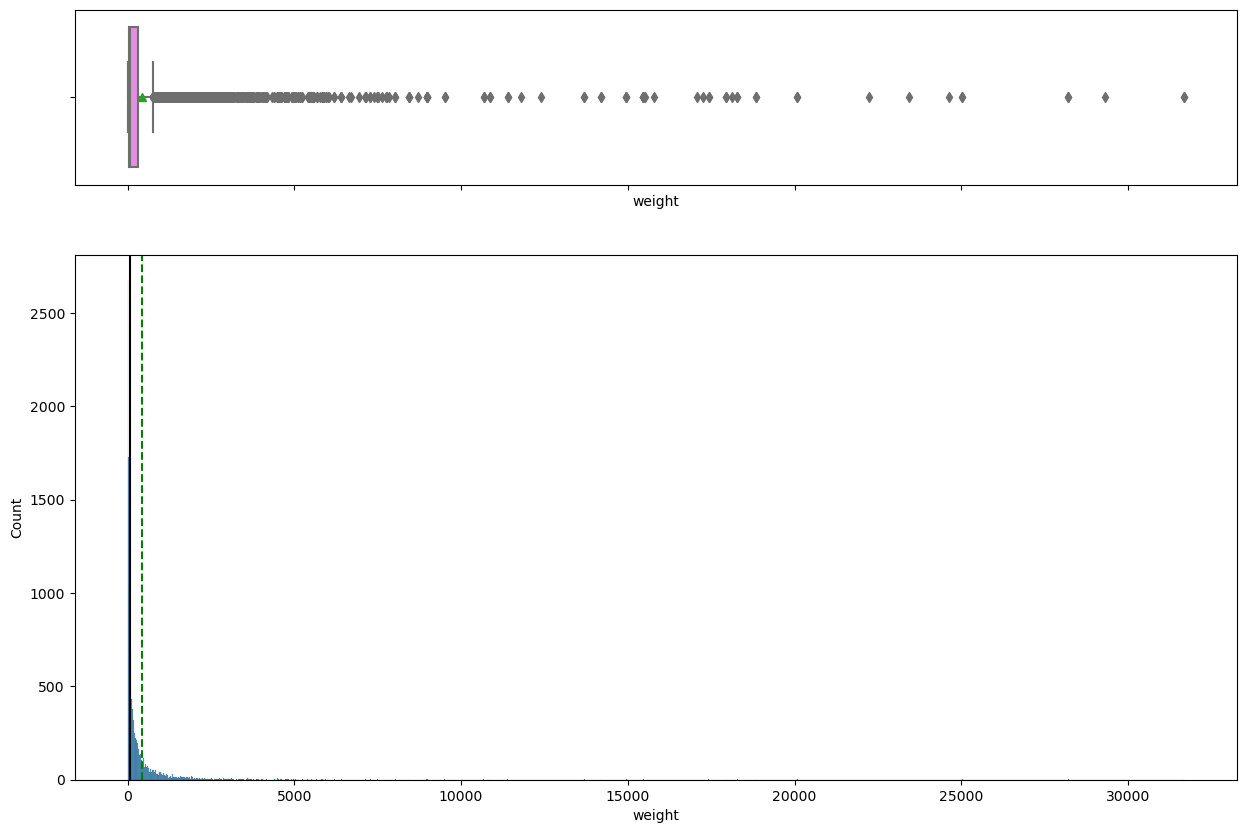

In [17]:
histogram_boxplot(data, "weight")
plt.savefig("output.jpg", bbox_inches='tight')

#### Observations on ageOFocc

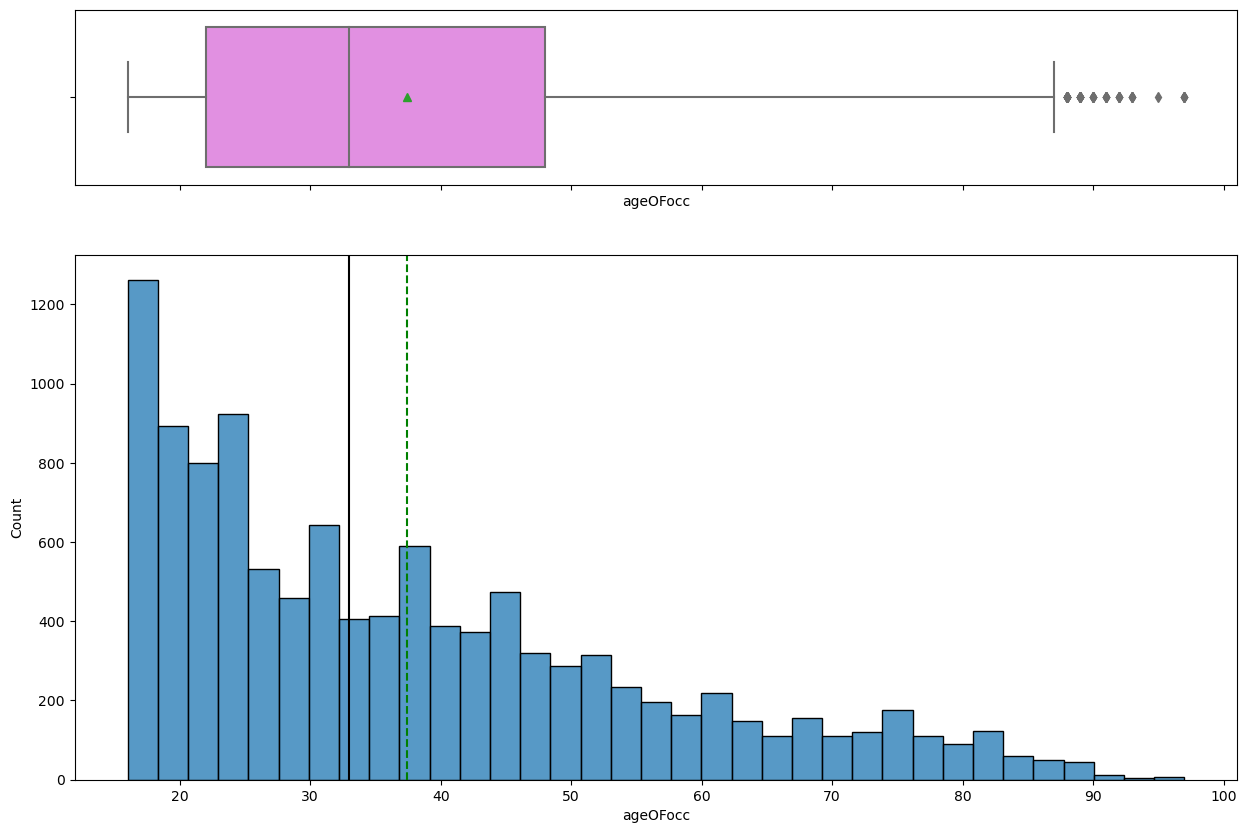

In [18]:
histogram_boxplot(data, "ageOFocc")
plt.savefig("output.jpg", bbox_inches='tight')

#### Observations on dvcat

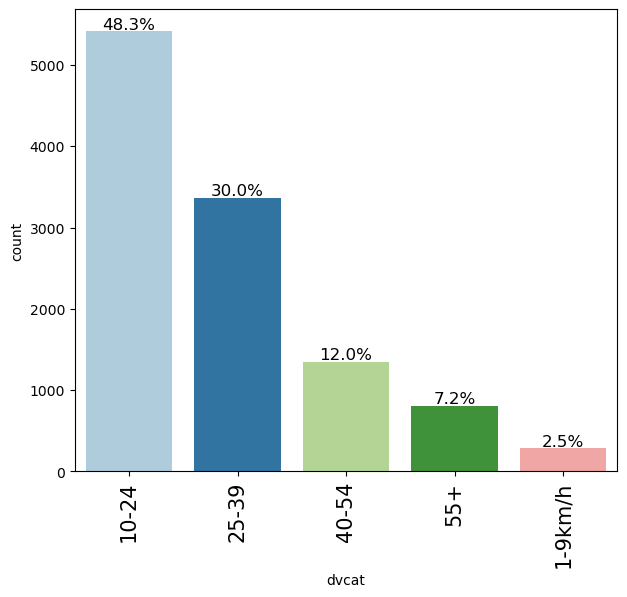

<Figure size 640x480 with 0 Axes>

In [19]:
labeled_barplot(data, "dvcat", perc=True)
plt.savefig("output.jpg", bbox_inches='tight')

#### Observations on Survived

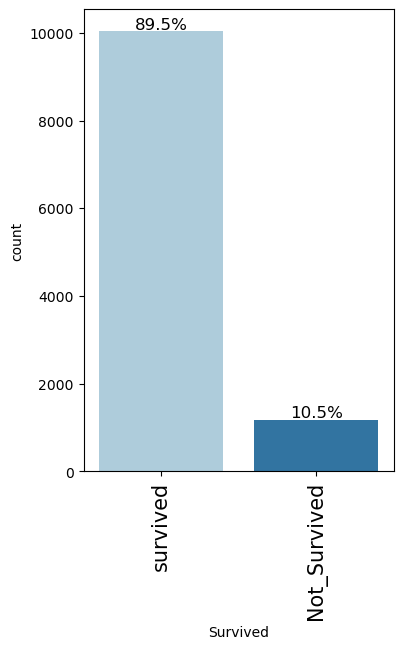

<Figure size 640x480 with 0 Axes>

In [20]:
labeled_barplot(data, "Survived", perc=True)
plt.savefig("output.jpg", bbox_inches='tight')

#### Observations on airbag

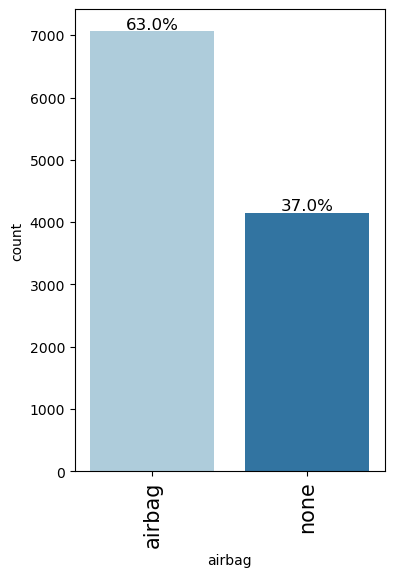

<Figure size 640x480 with 0 Axes>

In [21]:
labeled_barplot(data, "airbag", perc=True)
plt.savefig("output.jpg", bbox_inches='tight')

#### Observations on seatbelt

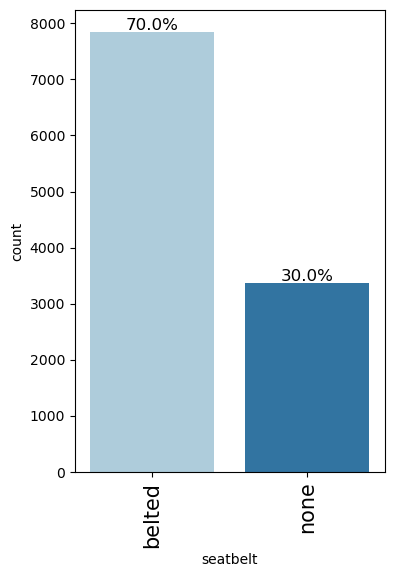

<Figure size 640x480 with 0 Axes>

In [22]:
labeled_barplot(data, "seatbelt", perc=True)
plt.savefig("output.jpg", bbox_inches='tight')

#### Observations on frontal

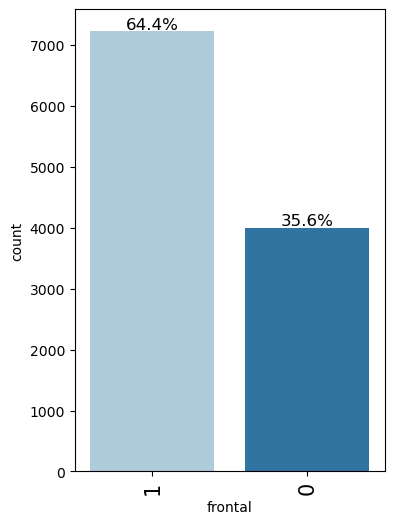

<Figure size 640x480 with 0 Axes>

In [23]:
labeled_barplot(data, "frontal", perc=True)
plt.savefig("output.jpg", bbox_inches='tight')

#### Observations on sex

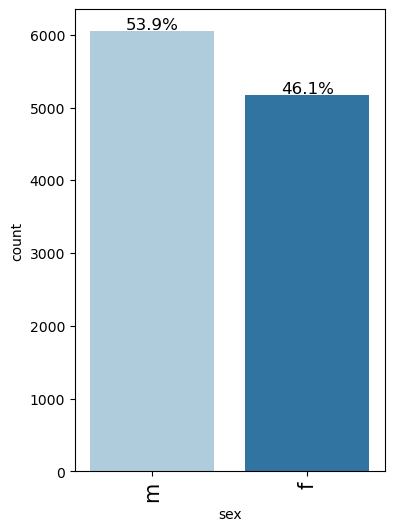

<Figure size 640x480 with 0 Axes>

In [24]:
labeled_barplot(data, "sex", perc=True)
plt.savefig("output.jpg", bbox_inches='tight')

#### Observations on abcat

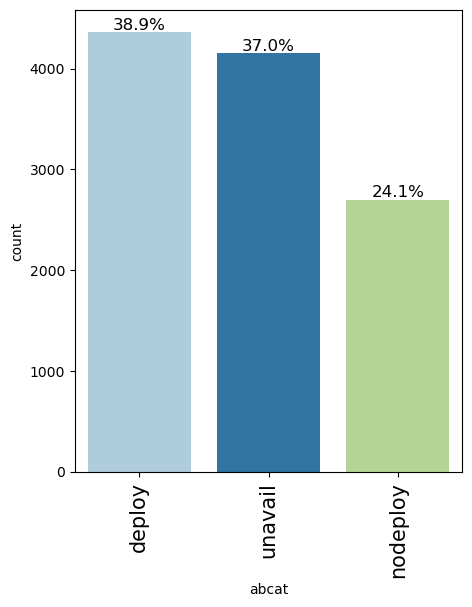

<Figure size 640x480 with 0 Axes>

In [25]:
labeled_barplot(data, "abcat", perc=True)
plt.savefig("output.jpg", bbox_inches='tight')

#### Observations on deploy

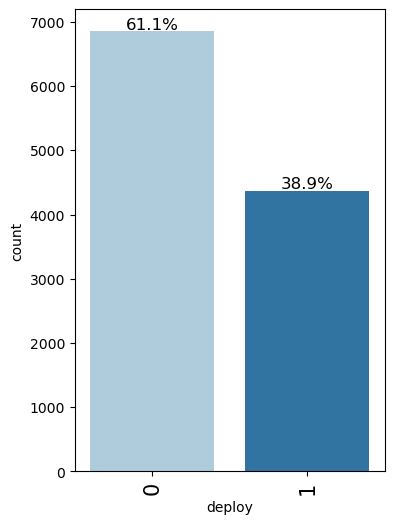

<Figure size 640x480 with 0 Axes>

In [26]:
labeled_barplot(data, "deploy", perc=True)
plt.savefig("output.jpg", bbox_inches='tight')

#### Observations on injSeverity

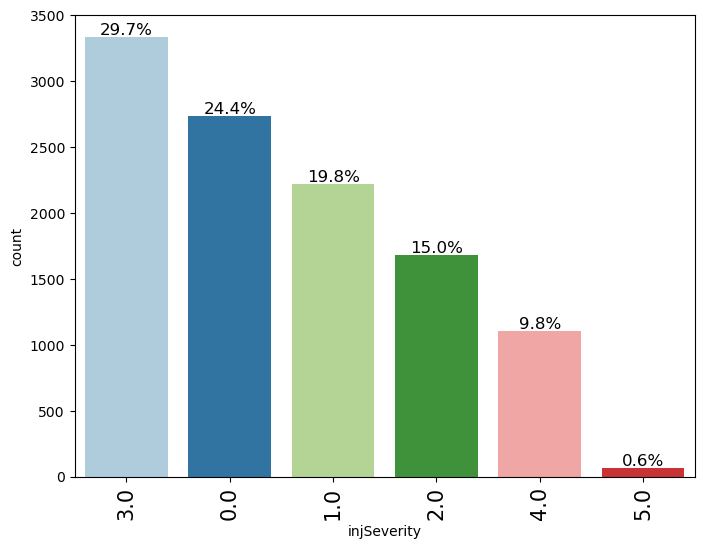

<Figure size 640x480 with 0 Axes>

In [27]:
labeled_barplot(data, "injSeverity", perc=True)
plt.savefig("output.jpg", bbox_inches='tight')

### Bivariate Analysis

Survived  Not_Survived  survived    All
dvcat                                  
All               1180     10037  11217
55+                415       394    809
40-54              344      1000   1344
25-39              304      3064   3368
10-24              114      5300   5414
1-9km/h              3       279    282
------------------------------------------------------------------------------------------------------------------------


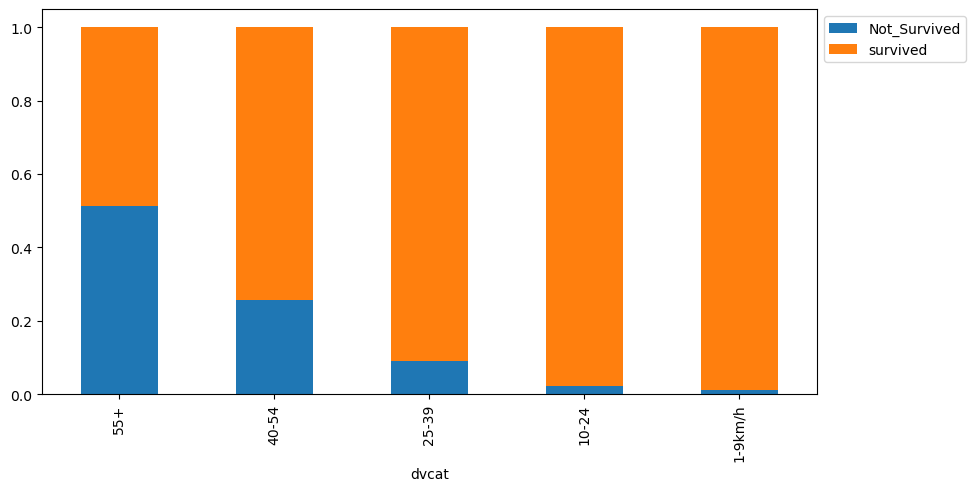

<Figure size 640x480 with 0 Axes>

In [28]:
#Observation on dvcat and Survived
stacked_barplot(data, "dvcat", "Survived")
plt.savefig("output.jpg", bbox_inches='tight')

Survived  Not_Survived  survived    All
seatbelt                               
All               1180     10037  11217
none               680      2688   3368
belted             500      7349   7849
------------------------------------------------------------------------------------------------------------------------


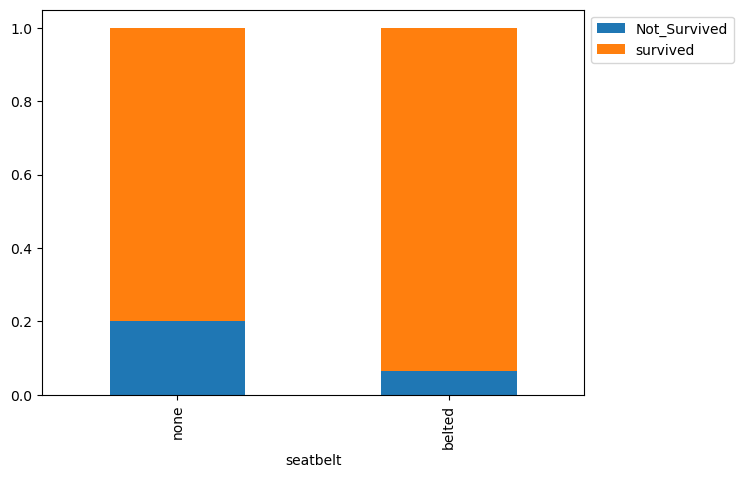

<Figure size 640x480 with 0 Axes>

In [29]:
#Observation on seatbelt and Survived
stacked_barplot(data, "seatbelt", "Survived")
plt.savefig("output.jpg", bbox_inches='tight')

Survived  Not_Survived  survived    All
frontal                                
All               1180     10037  11217
0                  598      3395   3993
1                  582      6642   7224
------------------------------------------------------------------------------------------------------------------------


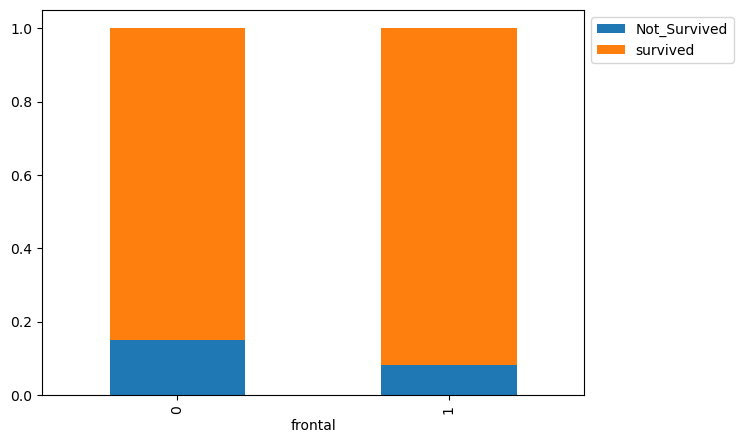

<Figure size 640x480 with 0 Axes>

In [30]:
# Observation on frontal and Survived
stacked_barplot(data, "frontal", "Survived")
plt.savefig("output.jpg", bbox_inches='tight')

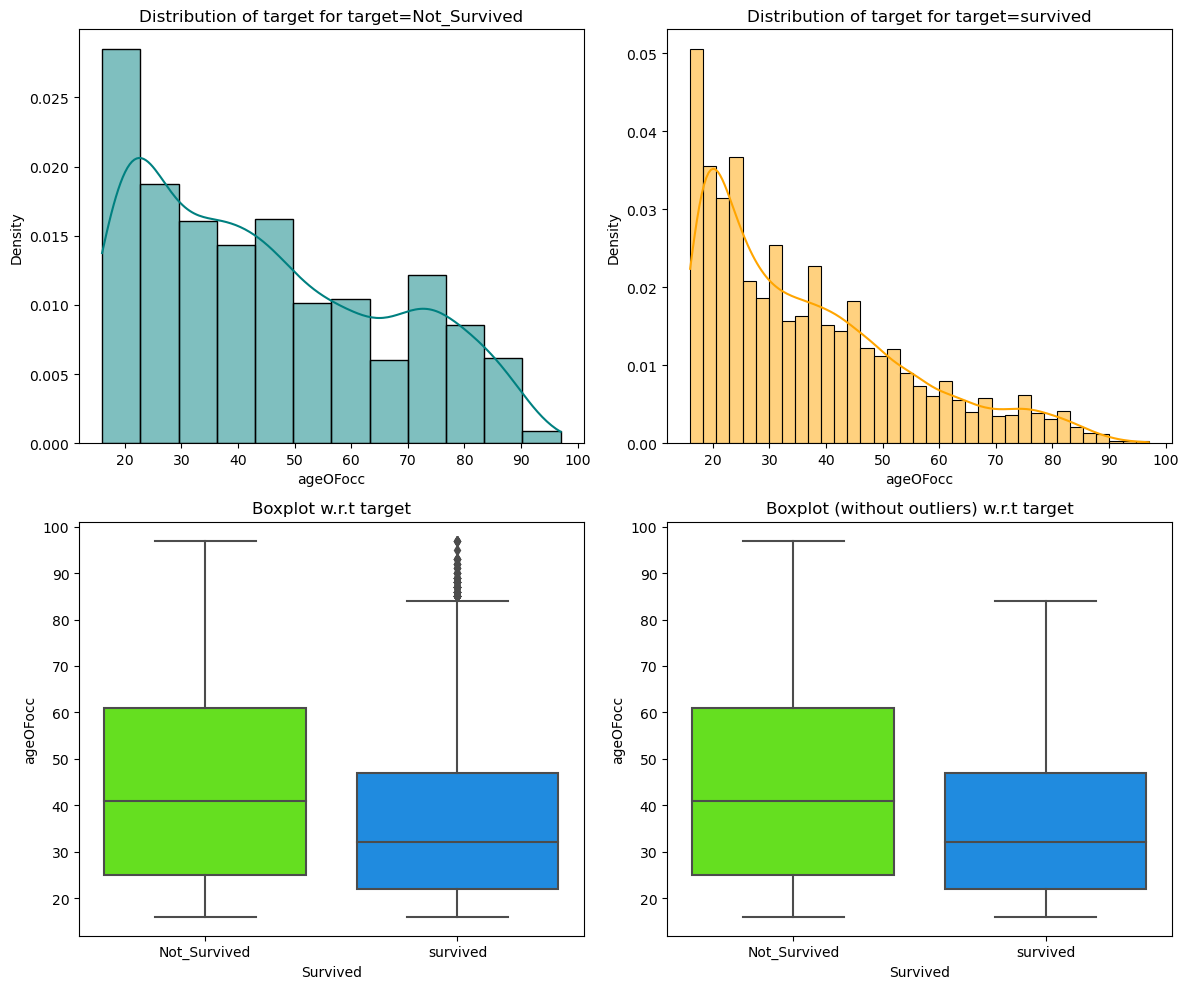

<Figure size 640x480 with 0 Axes>

In [31]:
#Distribution of ageOGocc on Survived
distribution_plot_wrt_target(data, "ageOFocc", "Survived")
plt.savefig("output.jpg", bbox_inches='tight')

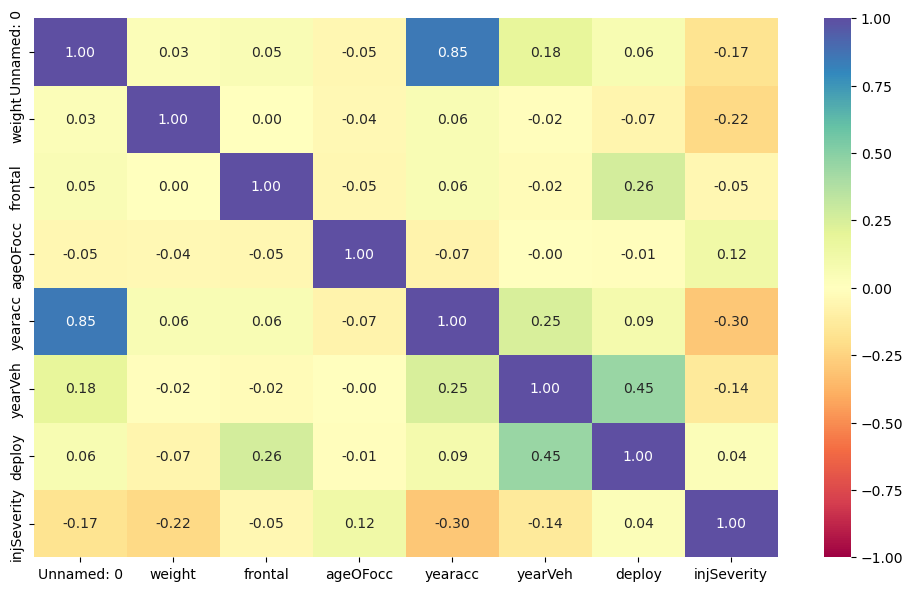

<Figure size 640x480 with 0 Axes>

In [32]:
# Correlation map

cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(                                                          #Plot a suitable map to find the correlation
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()
plt.savefig("output.jpg", bbox_inches='tight')

## Data Preprocessing

### Missing Value Treatment

In [33]:
data.isnull().sum() # Find the null values

Unnamed: 0      0
dvcat           0
weight          0
Survived        0
airbag          0
seatbelt        0
frontal         0
sex             0
ageOFocc        0
yearacc         0
yearVeh         0
abcat           0
occRole         0
deploy          0
injSeverity    77
caseid          0
dtype: int64

In [36]:
data['injSeverity'] = data['injSeverity'].fillna(data['injSeverity'].median())   # Impute the null values with a suitable measure

In [37]:
data.isnull().sum()

Unnamed: 0     0
dvcat          0
weight         0
Survived       0
airbag         0
seatbelt       0
frontal        0
sex            0
ageOFocc       0
yearacc        0
yearVeh        0
abcat          0
occRole        0
deploy         0
injSeverity    0
caseid         0
dtype: int64

### Outlier Check

- Let's check for outliers in the data.

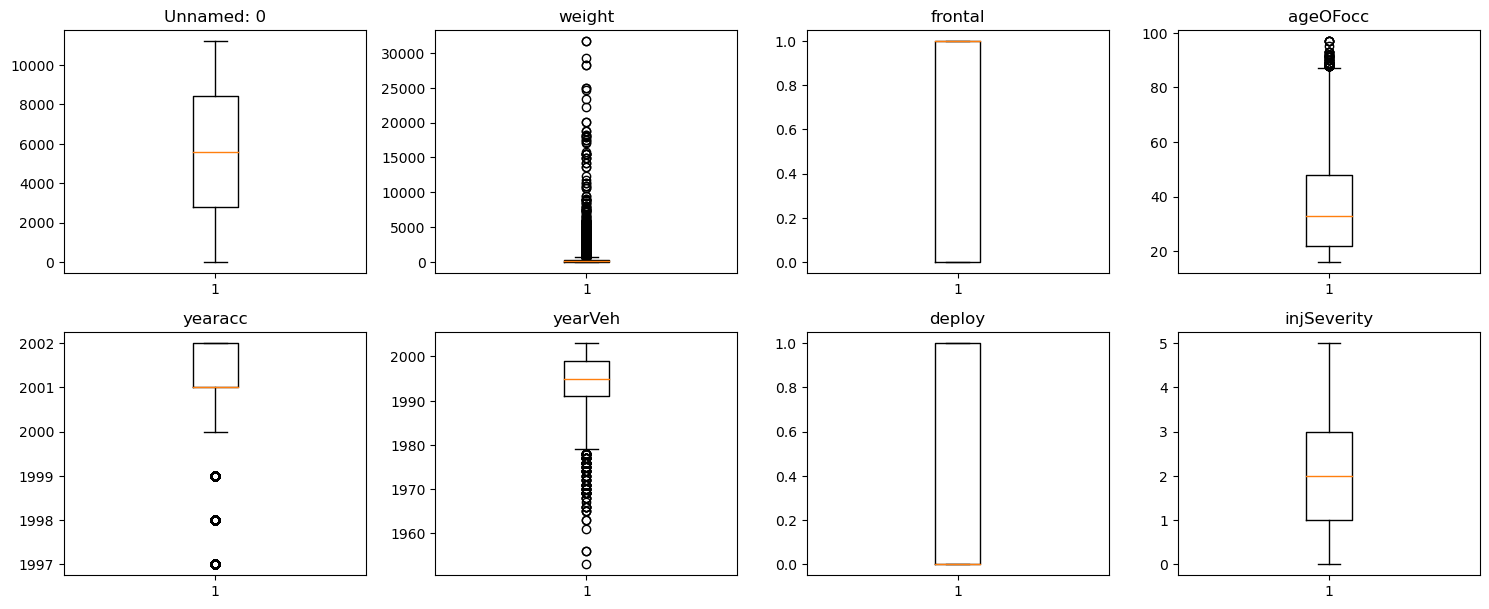

<Figure size 640x480 with 0 Axes>

In [38]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()
plt.savefig("output.jpg", bbox_inches='tight')

### Data Preparation for modeling

- We want to predict if the car crash was fatal or not.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

### Feature Engineering

In [39]:
data['ageOfVehicle'] = data['yearacc'] - data['yearVeh'] # Create a new feature to find the age of vehicle

In [40]:
data.groupby(['Survived']).ageOfVehicle.median()

Survived
Not_Survived   8.00000
survived       6.00000
Name: ageOfVehicle, dtype: float64

In [41]:
data.groupby(['Survived']).ageOfVehicle.mean()

Survived
Not_Survived   7.95508
survived       6.80422
Name: ageOfVehicle, dtype: float64


### Dropping the unique values column

In [42]:
# checking the number of unique values in applicable columns
data["dvcat"].nunique()

5

In [43]:
data["weight"].nunique()

4551

In [44]:
data["Survived"].nunique()

2

In [45]:
data["seatbelt"].nunique()

2

In [46]:
data["frontal"].nunique()

2

In [47]:
data["ageOFocc"].nunique()

80

In [48]:
data["sex"].nunique()

2

In [49]:
data["yearacc"].nunique()

6

In [50]:
data["yearVeh"].nunique()

43

In [51]:
data["abcat"].nunique()

3

In [52]:
data["occRole"].nunique()

2

In [53]:
data["injSeverity"].nunique()

6

In [54]:
data["deploy"].nunique()

2

**Let's drop the unnecessary columns first before we proceed forward**.

In [55]:
data = data.drop(["caseid"], axis=1) # drop all the unnecessary columns

In [56]:
data = data.drop(["Unnamed: 0"], axis=1) # drop all the unnecessary columns

### Encoding

In [91]:
data["Survived"].replace({'survived':1, "Not_survived":0},inplace=True) # Encode the target variable

In [92]:
# defining the dependent and independent variables
X = data.drop(["Survived"], axis=1)
y = data["Survived"]

In [93]:
# creating dummy variables
X = pd.get_dummies(                                                  # Perform dummy encoding on all the categorical variables
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

X.head()

,weight,frontal,ageOFocc,yearacc,yearVeh,deploy,injSeverity,ageOfVehicle,dvcat_10-24,dvcat_25-39,dvcat_40-54,dvcat_55+,airbag_none,seatbelt_none,sex_m,abcat_nodeploy,abcat_unavail,occRole_pass
0,27.07800,1,32,1997,1987.00000,0,4.00000,10.00000,0,0,0,1,1,1,1,0,1,0
1,89.62700,0,54,1997,1994.00000,0,4.00000,3.00000,0,1,0,0,0,0,0,1,0,0
2,27.07800,1,67,1997,1992.00000,0,4.00000,5.00000,0,0,0,1,1,0,1,0,1,0
3,27.07800,1,64,1997,1992.00000,0,4.00000,5.00000,0,0,0,1,1,0,0,0,1,1
4,13.37400,1,23,1997,1986.00000,0,4.00000,11.00000,0,0,0,1,1,1,1,0,1,0


### Data Split

In [94]:
# splitting the data in 70:30 ratio for train to test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [95]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Shape of Training set : ", y_train.shape)
print("Shape of test set : ", y_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (7851, 18)
Shape of test set :  (3366, 18)
Shape of Training set :  (7851,)
Shape of test set :  (3366,)
Percentage of classes in training set:
1   0.89848
0   0.10152
Name: Survived, dtype: float64
Percentage of classes in test set:
1   0.88622
0   0.11378
Name: Survived, dtype: float64


## Model Building

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn function will be used to check the model performance of models.
* The confusion_matrix_sklearn function will be used to plot the confusion matrix.

In [119]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [120]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Logistic Regression (with Sklearn)

In [98]:
model = LogisticRegression(random_state=1)  # Build a logictic regression model

In [99]:
model

LogisticRegression(random_state=1)

In [100]:
model.fit

<bound method LogisticRegression.fit of LogisticRegression(random_state=1)>

In [101]:
model.fit(X_train, y_train)

LogisticRegression(random_state=1)

#### Checking model performance on training set

In [102]:
logistic_reg_perf_train = model_performance_classification_sklearn(model, X_train, y_train)
logistic_reg_perf_train

,Accuracy,Recall,Precision,F1
0,0.98255,0.99206,0.98856,0.99031


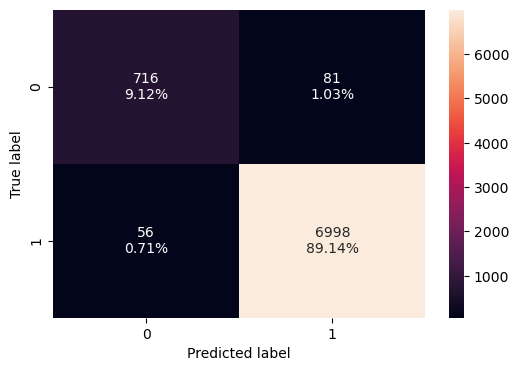

In [103]:
confusion_matrix_sklearn(model, X_train, y_train)

#### Checking model performance on test set

In [104]:
logistic_reg_perf_test = model_performance_classification_sklearn(model, X_test, y_test)
logistic_reg_perf_test

,Accuracy,Recall,Precision,F1
0,0.98039,0.99229,0.98568,0.98897


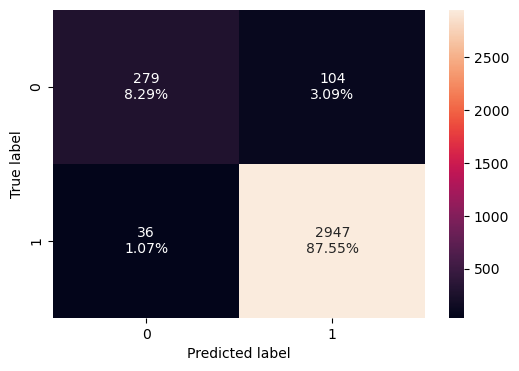

In [124]:
confusion_matrix_sklearn(model, X_test, y_test)

In [127]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix for the logistic regression model on the test set
conf_matrix_test = (model, X_test, y_test)
print("Confusion Matrix (Test Set):")
print(conf_matrix_test)

Confusion Matrix (Test Set):
(LinearDiscriminantAnalysis(),          weight  frontal  ageOFocc  yearacc    yearVeh  deploy  injSeverity  \
3555  126.13800        1        22     2001 1981.00000       0      5.00000   
4485   80.23000        0        88     2001 1989.00000       0      4.00000   
7670  760.90100        0        25     2002 1992.00000       0      0.00000   
10516  77.79300        1        36     2002 1999.00000       0      1.00000   
5812   64.86300        0        40     2001 1993.00000       0      3.00000   
...         ...      ...       ...      ...        ...     ...          ...   
4740  139.36000        0        21     2001 1992.00000       0      3.00000   
10915   9.82200        1        21     2002 1996.00000       1      1.00000   
3097   24.48300        0        29     2001 2000.00000       0      3.00000   
10100 170.27600        0        20     2002 2000.00000       0      0.00000   
694    67.80200        1        66     2000 1989.00000       0      4.0

#### ROC-AUC


Train ROC-AUC score is : 0.9867268773352295

Test ROC-AUC score is : 0.9874860939580163


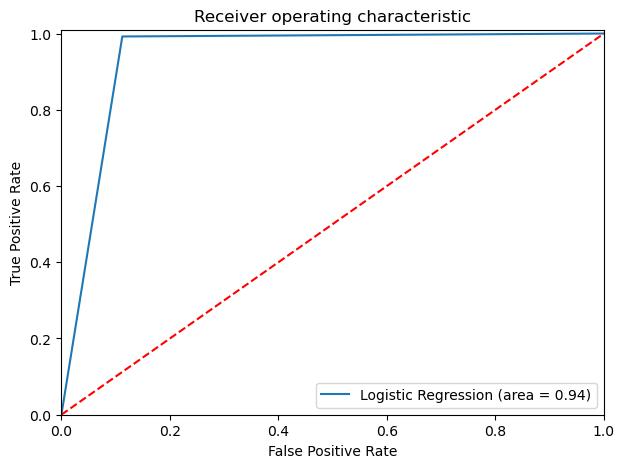

In [107]:
print("\nTrain ROC-AUC score is : {}".format(roc_auc_score(y_train,model.predict_proba(X_train)[:,1])))

print("\nTest ROC-AUC score is : {}".format(roc_auc_score(y_test,model.predict_proba(X_test)[:,1])))
logit_roc_auc_test = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

Feature: weight, Score: 0.00431
Feature: frontal, Score: 1.03968
Feature: ageOFocc, Score: -0.03866
Feature: yearacc, Score: 0.01859
Feature: yearVeh, Score: -0.01013
Feature: deploy, Score: 0.09951
Feature: injSeverity, Score: -4.29383
Feature: ageOfVehicle, Score: 0.02872
Feature: dvcat_10-24, Score: 1.18965
Feature: dvcat_25-39, Score: 0.16354
Feature: dvcat_40-54, Score: -0.38891
Feature: dvcat_55+, Score: -1.10087
Feature: airbag_none, Score: -0.27375
Feature: seatbelt_none, Score: -0.72715
Feature: sex_m, Score: -0.32717
Feature: abcat_nodeploy, Score: 0.16934
Feature: abcat_unavail, Score: -0.27375
Feature: occRole_pass, Score: -0.08803


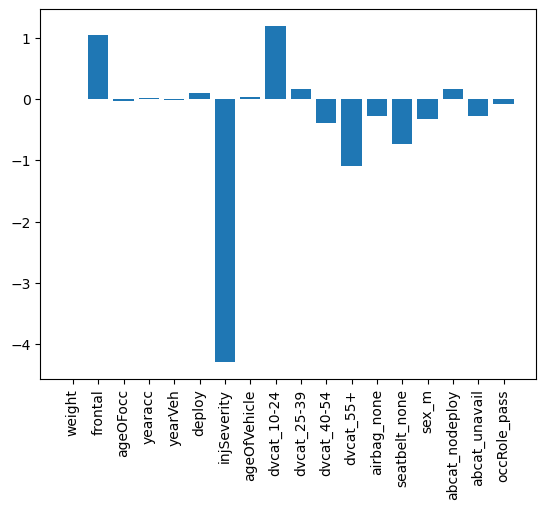

In [108]:
# get importance
importance = model.coef_[0]
importance
# summarize feature importance
column_names=X_train.columns
for i, (col_name, score) in enumerate(zip(column_names, importance)):
    print('Feature: %s, Score: %.5f' % (col_name, score))
# plot feature importance
plt.bar([x for x in X_train.columns], importance)
plt.xticks(rotation=90)
plt.show()

### Building Linear Discriminant Analysis

In [109]:
#Build LDA Model
model = LinearDiscriminantAnalysis()
model.fit(X_train,y_train)

LinearDiscriminantAnalysis()

####Checking model performance on training set

In [110]:
lda_perf_train = model_performance_classification_sklearn(model, X_train, y_train)
lda_perf_train

,Accuracy,Recall,Precision,F1
0,0.95567,0.98356,0.96764,0.97553


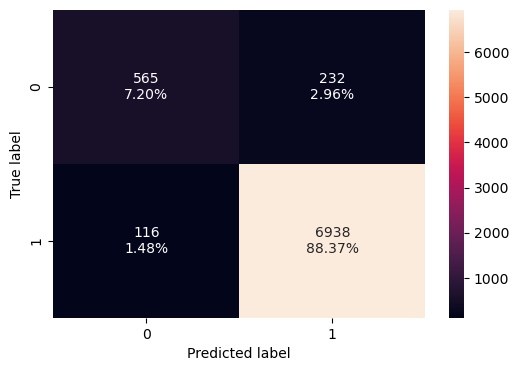

In [111]:
confusion_matrix_sklearn(model, X_train, y_train)

####Checking model performance on test set

In [112]:
lda_perf_test =model_performance_classification_sklearn(model, X_test, y_test)
lda_perf_test

,Accuracy,Recall,Precision,F1
0,0.95841,0.98793,0.96591,0.97680


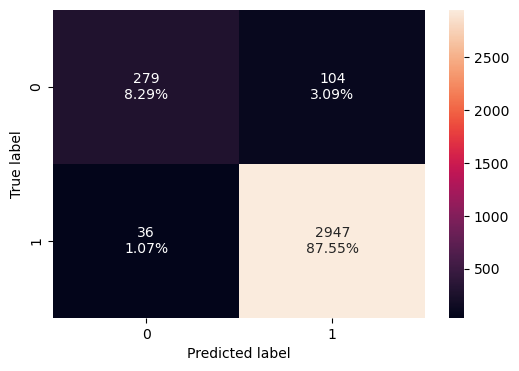

In [113]:
confusion_matrix_sklearn(model, X_test, y_test)


Train ROC-AUC score is : 0.9689817109027011

Test ROC-AUC score is : 0.9655270203914437


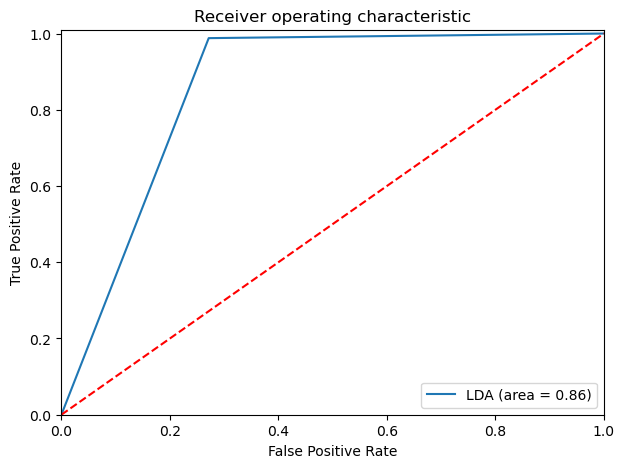

In [114]:
print("\nTrain ROC-AUC score is : {}".format(roc_auc_score(y_train,model.predict_proba(X_train)[:,1])))

print("\nTest ROC-AUC score is : {}".format(roc_auc_score(y_test,model.predict_proba(X_test)[:,1])))
lda_roc_auc_test = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="LDA (area = %0.2f)" % lda_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

Feature: weight, Score: -0.00013
Feature: frontal, Score: 1.02274
Feature: ageOFocc, Score: -0.02970
Feature: yearacc, Score: 2.36381
Feature: yearVeh, Score: 0.01794
Feature: deploy, Score: 0.06156
Feature: injSeverity, Score: -1.38148
Feature: ageOfVehicle, Score: 0.04255
Feature: dvcat_10-24, Score: 0.19864
Feature: dvcat_25-39, Score: 0.12479
Feature: dvcat_40-54, Score: -1.59949
Feature: dvcat_55+, Score: -5.18418
Feature: airbag_none, Score: -0.06531
Feature: seatbelt_none, Score: -0.46753
Feature: sex_m, Score: -0.39722
Feature: abcat_nodeploy, Score: 0.00242
Feature: abcat_unavail, Score: -0.06531
Feature: occRole_pass, Score: -0.15153


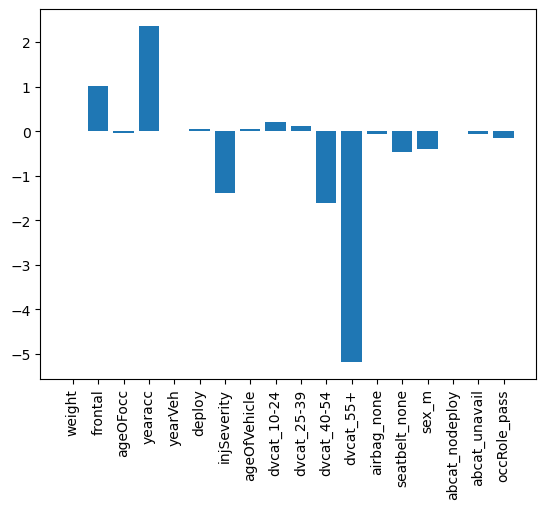

In [115]:
# get importance
importance = model.coef_[0]
importance
# summarize feature importance
column_names=X_train.columns
for i, (col_name, score) in enumerate(zip(column_names, importance)):
    print('Feature: %s, Score: %.5f' % (col_name, score))
# plot feature importance
plt.bar([x for x in X_train.columns], importance)
plt.xticks(rotation=90)
plt.show()

## Model Performance Comparison and Final Model Selection

In [116]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        logistic_reg_perf_train.T,
        lda_perf_train.T,
            ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression Base",
    "Linear Discriminant Analysis Base",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression Base,Linear Discriminant Analysis Base
Accuracy,0.98255,0.95567
Recall,0.99206,0.98356
Precision,0.98856,0.96764
F1,0.99031,0.97553


In [128]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        logistic_reg_perf_test.T,
        lda_perf_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression Base",
    "Linear Discriminant Analysis Base",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression Base,Linear Discriminant Analysis Base
Accuracy,0.98039,0.95841
Recall,0.99229,0.98793
Precision,0.98568,0.96591
F1,0.98897,0.97680


## Business Insights & Recommendations